In [1]:
# %matplotlib notebook
%matplotlib inline 
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from tqdm.notebook import tqdm_notebook
import time

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["font.size"] = 16
import seaborn as sns
# sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")


# My packages
from source import parse_mxml as pm
from source import log_representation as lr
from source import plots as plts
from source import drift_detection as dd
from source import drift_localization as dl
from source import offline_streaming_clustering as off_sc
from source import Markov_Association_Drift_Detection as MARDD

import sklearn
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
import hdbscan
from sklearn.base import clone as sk_clone 
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from sklearn.decomposition import PCA, TruncatedSVD
import ruptures as rpt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

# import rpy2
# from rpy2.robjects.packages import importr
# utils = importr('utils')
# utils.install_packages('bcp')

import random
random.seed(42)

import os
import glob

import gc
gc.enable()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

print('The scikit-learn version is {}.'.format(sklearn.__version__))
# import sys
# print(sys.path)

The scikit-learn version is 0.24.2.


In [2]:
def insensitive_glob(pattern):
    def either(c):
        return '[%s%s]' % (c.lower(), c.upper()) if c.isalpha() else c
    return glob.glob(''.join(map(either, pattern)))

def if_any(string, lista):
    for l in lista:
        if l in string:
            return True
    return False

In [3]:
logs = insensitive_glob("../../../../../../../Datasets/Business_Process_Drift_Logs/Logs/*/*k.*")#MXML")

In [4]:
logs = [x for x in logs if "2.5" not in x]

In [5]:
pd.DataFrame(logs)

0
0      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb10k.mxml
1       ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb5k.mxml
2     ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cb\cb7.5k.mxml
3      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cd\cd10k.mxml
4       ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cd\cd5k.MXML
5     ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cd\cd7.5k.MXML
6      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cf\cf10k.mxml
7       ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cf\cf5k.mxml
8     ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cf\cf7.5k.mxml
9      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cm\cm10k.mxml
10      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cm\cm5k.mxml
11    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cm\cm7.5k.mxml
12     ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cp\cp10k.mxml
13      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cp\cp5k.mxml
14    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\cp\cp7.5k.mxml
15     ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\fr\fr10k.MXML
16      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\fr\fr5k.MXML
17    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\fr\fr7.5k.MXML
18   ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\IOR\IOR10k.MXML
19    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\IOR\IOR5k.MXML
20  ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\IOR\IOR7.5k.mxml
21   ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\IRO\IRO10k.MXML
22    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\IRO\IRO5k.MXML
23  ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\IRO\IRO7.5k.mxml
24     ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\lp\lp10k.mxml
25      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\lp\lp5k.mxml
26    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\lp\lp7.5k.mxml
27   ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\OIR\OIR10k.MXML
28    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\OIR\OIR5k.MXML
29  ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\OIR\OIR7.5k.MXML
30   ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\ORI\ORI10k.MXML
31    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\ORI\ORI5k.MXML
32  ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\ORI\ORI7.5k.MXML
33     ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\pl\pl10k.mxml
34      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\pl\pl5k.mxml
35    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\pl\pl7.5k.mxml
36     ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\pm\pm10k.mxml
37      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\pm\pm5k.mxml
38    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\pm\pm7.5k.MXML
39     ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\re\re10k.mxml
40      ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\re\re5k.mxml
41    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\re\re7.5k.mxml
42   ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\RIO\RIO10k.MXML
43    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\RIO\RIO5k.MXML
44  ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\RIO\RIO7.5k.MXML
45   ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\ROI\ROI10k.MXML
46    ../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\ROI\ROI5k.MXML
47  ../../../../../../..\Datasets\Business_Process

### Read and Prep log file

In [268]:
log = logs[15]
print(log)
log_read = pm.all_prep(log)
tokens = lr.get_traces_as_tokens(log_read)
y_true = list(range(int(len(tokens)/10), len(tokens), int(len(tokens)/10)))
print(len(tokens))
print(len(tokens.unique()))

../../../../../../..\Datasets\Business_Process_Drift_Logs\Logs\fr\fr10k.MXML
10000
49


In [269]:
tokens[0]

'START Loan__application_received Check__application__form_completeness Appraise_property Check_credit_history Assess_loan_risk Assess_eligibility Reject_application Loan_application_rejected END'

In [270]:
tokens[1001]

'START Loan__application_received Check__application__form_completeness Check_credit_history Assess_loan_risk Appraise_property Assess_eligibility Prepare_acceptance_pack Check_if_home_insurance_quote_is_requested Send_home_insurance_quote Verify_repayment_agreement Approve_application Loan__application_approved END'

In [271]:
df = pd.DataFrame(tokens.str.split()).explode('Activity').rename(columns={"Activity": "From"})
print(df.nunique())
df["From"].value_counts()

From    21
dtype: int64


Check__application__form_completeness         11091
END                                           10000
Appraise_property                             10000
START                                         10000
Loan__application_received                    10000
Check_credit_history                          10000
Assess_eligibility                            10000
Assess_loan_risk                              10000
Prepare_acceptance_pack                        5025
Verify_repayment_agreement                     5025
Check_if_home_insurance_quote_is_requested     5025
Loan_application_rejected                      4975
Reject_application                             4975
Send_home_insurance_quote                      3254
Loan__application_approved                     2527
Approve_application                            2527
Cancel_application                             2498
Loan__application_canceled                     2498
Send_acceptance_pack                           1771
Return_appli

### Trace Clustering

In [272]:
clustering_window_size=250
sliding_step = 0

In [273]:
# from sequential_pattern_mining import ERMiner
# model = ERMiner(minsup=DEFAULT_PARAMS['minsup'],
#                     minconf=DEFAULT_PARAMS['minconf'],
#                     single_consequent=False)

# model.fit(data)
# print("{} valid rules found.".format(len(model.valid_rules)))
# model.rules_to_df(args.outpath)

In [274]:
df1 = lr.get_assrules_markov_alpha_representation(tokens[0:250])
df1

markov_support  \
antecedents                                consequents                                                  
Appraise_property                          Appraise_property                                 0.000000   
                                           Approve_application                               0.000000   
                                           Assess_eligibility                                0.023992   
                                           Assess_loan_risk                                  0.022601   
                                           Cancel_application                                0.000000   
                                           Check__application__form_completeness             0.000000   
                                           Check_credit_history                              0.040334   
                                           Check_if_home_insurance_quote_is_requested        0.000000   
                                           Loan__application_approved                        0.000000   
                                           Loan__application_canceled                        0.000000   
                                           Loan__application_received                        0.000000   
                                           Loan_application_rejected                         0.000000   
                                           Prepare_acceptance_pack                           0.000000   
                                           Receive_updated_application                       0.000000   
                                           Reject_application                                0.000000   
                                           Return_application_back_to_applicant              0.000000   
                                           Send_acceptance_pack                              0.000000   
                                           Send_home_insurance_quote                         0.000000   
                                           Verify_repayment_agreement                        0.000000   
Approve_application                        Appraise_property                                 0.000000   
                                           Approve_application                               0.000000   
                                           Assess_eligibility                                0.000000   
                                           Assess_loan_risk                                  0.000000   
                                           Cancel_application                                0.000000   
                                           Check__application__form_completeness             0.000000   
                                           Check_credit_history                              0.000000   
                                           Check_if_home_insurance_quote_is_requested        0.000000   
                                           Loan__application_approved                        0.022253   
                                           Loan__application_canceled                        0.000000   
                                           Loan__application_received                        0.000000   
                                           Loan_application_rejected                         0.000000   
                                           Prepare_acceptance_pack                           0.000000   
                                           Receive_updated_application                       0.000000   
                                           Reject_application                                0.000000   
                                           Return_application_back_to_applicant              0.000000   
                                           Send_acceptance_pack                              0.000000   
                                           Send_home_insurance_quote                         0.00

In [275]:
df2 = lr.get_assrules_markov_alpha_representation(tokens[250:500])
df2

markov_support  \
antecedents                                consequents                                                  
Appraise_property                          Appraise_property                                 0.000000   
                                           Approve_application                               0.000000   
                                           Assess_eligibility                                0.024011   
                                           Assess_loan_risk                                  0.024011   
                                           Cancel_application                                0.000000   
                                           Check__application__form_completeness             0.000000   
                                           Check_credit_history                              0.040254   
                                           Check_if_home_insurance_quote_is_requested        0.000000   
                                           Loan__application_approved                        0.000000   
                                           Loan__application_canceled                        0.000000   
                                           Loan__application_received                        0.000000   
                                           Loan_application_rejected                         0.000000   
                                           Prepare_acceptance_pack                           0.000000   
                                           Receive_updated_application                       0.000000   
                                           Reject_application                                0.000000   
                                           Return_application_back_to_applicant              0.000000   
                                           Send_acceptance_pack                              0.000000   
                                           Send_home_insurance_quote                         0.000000   
                                           Verify_repayment_agreement                        0.000000   
Approve_application                        Appraise_property                                 0.000000   
                                           Approve_application                               0.000000   
                                           Assess_eligibility                                0.000000   
                                           Assess_loan_risk                                  0.000000   
                                           Cancel_application                                0.000000   
                                           Check__application__form_completeness             0.000000   
                                           Check_credit_history                              0.000000   
                                           Check_if_home_insurance_quote_is_requested        0.000000   
                                           Loan__application_approved                        0.021186   
                                           Loan__application_canceled                        0.000000   
                                           Loan__application_received                        0.000000   
                                           Loan_application_rejected                         0.000000   
                                           Prepare_acceptance_pack                           0.000000   
                                           Receive_updated_application                       0.000000   
                                           Reject_application                                0.000000   
                                           Return_application_back_to_applicant              0.000000   
                                           Send_acceptance_pack                              0.000000   
                                           Send_home_insurance_quote                         0.00

In [276]:
difference = df1.subtract(df2, fill_value=0)
difference
print("Total diff: ",abs(difference)["Self_loop"].sum())
abs(difference).sort_values(by="Self_loop", ascending=False)

Total diff:  0.0


markov_support  \
antecedents                                consequents                                                  
Appraise_property                          Appraise_property                                 0.000000   
Receive_updated_application                Approve_application                               0.000000   
Prepare_acceptance_pack                    Verify_repayment_agreement                        0.000000   
                                           Send_home_insurance_quote                         0.000000   
                                           Send_acceptance_pack                              0.000000   
                                           Return_application_back_to_applicant              0.000000   
                                           Reject_application                                0.000000   
                                           Receive_updated_application                       0.000000   
                                           Prepare_acceptance_pack                           0.000000   
                                           Loan_application_rejected                         0.000000   
                                           Loan__application_received                        0.000000   
                                           Loan__application_canceled                        0.000000   
                                           Loan__application_approved                        0.000000   
                                           Check_if_home_insurance_quote_is_requested        0.002101   
                                           Check_credit_history                              0.000000   
                                           Check__application__form_completeness             0.000000   
                                           Cancel_application                                0.000000   
                                           Assess_loan_risk                                  0.000000   
                                           Assess_eligibility                                0.000000   
                                           Approve_application                               0.000000   
                                           Appraise_property                                 0.000000   
Receive_updated_application                Appraise_property                                 0.000000   
                                           Assess_eligibility                                0.000000   
Loan__application_canceled                 Loan__application_received                        0.000000   
Receive_updated_application                Assess_loan_risk                                  0.000000   
Reject_application                         Assess_loan_risk                                  0.000000   
                                           Assess_eligibility                                0.000000   
                                           Approve_application                               0.000000   
                                           Appraise_property                                 0.000000   
Receive_updated_application                Verify_repayment_agreement                        0.000000   
                                           Send_home_insurance_quote                         0.000000   
                                           Send_acceptance_pack                              0.000000   
                                           Return_application_back_to_applicant              0.000000   
                                           Reject_application                                0.000000   
                                           Receive_updated_application                       0.000000   
                                           Prepare_acceptance_pack                           0.000000   
                                           Loan_application_rejected                         0.00

In [277]:
# transitions = pd.DataFrame(tokens.str.split()).explode('Activity').rename(columns={"Activity": "antecedents"})
# transitions["consequents"] = transitions.groupby('Trace_order').shift(-1)
# transitions = transitions.dropna(axis=0)
# transitions[transitions['antecedents']==transitions['consequents']]

In [278]:
# tokens[188]

In [279]:
# transitions[transitions.index==188]

In [294]:
from scipy import stats
diff_mean = []
diff_sum = []
diff_max = []
representation_comp = pd.DataFrame()
metrics = ['markov_support','markov_confidence','markov_leverage'#, 'markov_conviction'
        , 'Causality', 'Parallel', 'Choice', 'Direct_succession', 'Involved_loop', 'Self_loop'
        #, 'assrules_support', 'assrules_confidence', 'assrules_leverage', 'assrules_conviction'
          ] 
# metrics = ['markov_support', 'markov_antecedents_support',
#        'markov_consequents_support', 'markov_confidence','markov_lift',
#        'markov_leverage', 'markov_conviction', 'Direct_succession',
#        'Opposite_direction', 'Causality', 'Parallel', 'Choice',
#        'assrules_antecedent support', 'assrules_consequent support',
#        'assrules_support', 'assrules_confidence', 'assrules_lift',
#        'assrules_leverage', 'assrules_conviction']

if sliding_step>0:
    loop = range(0, len(tokens) - clustering_window_size + 1, sliding_step)
else:
    loop = range(0, len(tokens), clustering_window_size)
        
for i in loop:
#     print("iteration:",i)
    representation = lr.get_assrules_markov_alpha_representation(tokens[i:i+clustering_window_size])
    representation = representation[metrics]
    
    if representation_comp.shape[0] > 0:
        difference = representation.subtract(representation_comp, fill_value=0)
        diff_mean.append((abs(difference)+1).mean())
        diff_sum.append((abs(difference)+1).sum())
        diff_max.append((abs(difference)+1).max())
#         diff_mean.append((np.log(abs(difference)+1)).mean())
#         diff_sum.append((np.log(abs(difference)+1)).sum())
#         diff_max.append((np.log(abs(difference)+1)).max())
#         diff_mean.append(((abs(difference)+1)**4).mean())
#         diff_sum.append(((abs(difference)+1)**4).sum())
#         diff_max.append(((abs(difference)+1)**4).max())
    
    representation_comp = representation
    
#     representation.replace([np.inf, -np.inf], 0).plot()
#     representation.replace([np.inf, -np.inf], 0).cumsum().plot(use_index=False)
#     lr.get_association_rules_representation(tokens[i:i+clustering_window_size]).replace([np.inf, -np.inf], 0).sum(axis=1).sort_values().plot(use_index=False)
#     lr.get_association_rules_representation(tokens[i:i+clustering_window_size]).replace([np.inf, -np.inf], 0)['conviction'].plot()
#     print(np.count_nonzero(lr.get_association_rules_representation(tokens[i:i+clustering_window_size]).replace([np.inf, -np.inf], 0)['conviction']))
#     lr.get_association_rules_representation(tokens[i:i+clustering_window_size]) \
#         ['conviction'].replace([np.inf, -np.inf], 0).sort_values().plot(use_index=False)
#     print(representation.shape)
#     plt.show()
diff_mean = pd.DataFrame(diff_mean)
diff_sum = pd.DataFrame(diff_sum)
diff_max = pd.DataFrame(diff_max)
diff_comb = diff_mean + diff_max

In [281]:
window=1

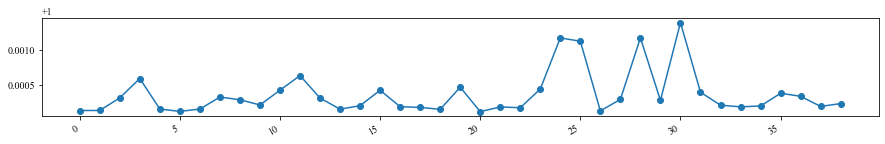

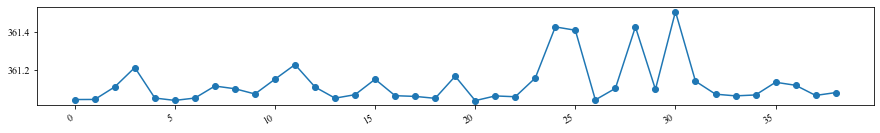

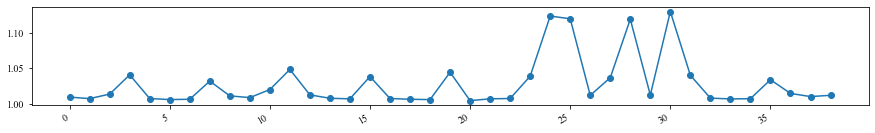

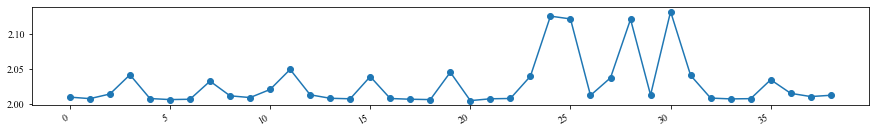

In [296]:
diff_mean_total = diff_mean.mean(axis=1)
diff_mean_total.rolling(window=window).mean().plot(figsize=(15,2), subplots=True, marker='o')
plt.show()

diff_sum_total = diff_sum.mean(axis=1)
diff_sum_total.rolling(window=window).mean().plot(figsize=(15,2), subplots=True, marker='o')
plt.show()

diff_max_total = diff_max.mean(axis=1)
diff_max_total.rolling(window=window).mean().plot(figsize=(15,2), subplots=True, marker='o')
plt.show()

diff_comb_total = diff_comb.mean(axis=1)
diff_comb_total.rolling(window=window).mean().plot(figsize=(15,2), subplots=True, marker='o')
plt.show()

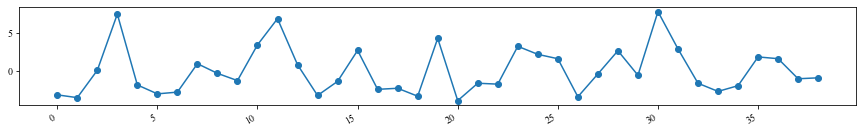

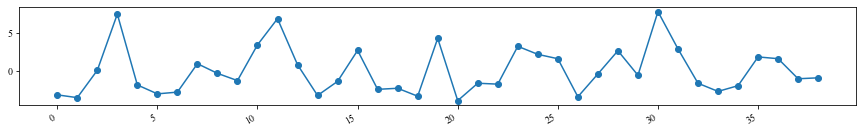

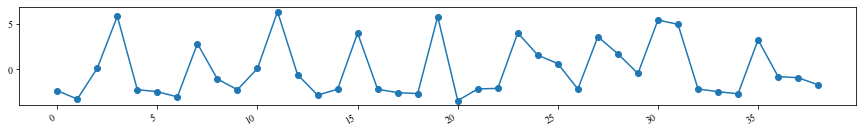

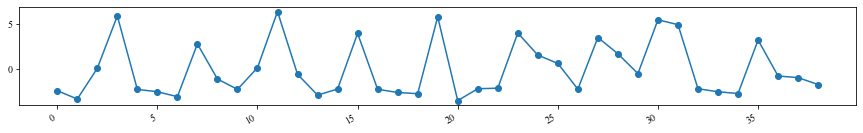

In [297]:
# diff_mean_total = (diff_mean-diff_mean.min())/(diff_mean.max()-diff_mean.min())
diff_mean_total = (diff_mean-diff_mean.mean())/diff_mean.std()
diff_mean_total = diff_mean_total.sum(axis=1)
diff_mean_total.rolling(window=window).mean().plot(figsize=(15,2), subplots=True, marker='o')
plt.show()

# diff_sum_total = (diff_sum-diff_sum.min())/(diff_sum.max()-diff_sum.min())
diff_sum_total = (diff_sum-diff_sum.mean())/diff_sum.std()
diff_sum_total = diff_sum_total.sum(axis=1)
diff_sum_total.rolling(window=window).mean().plot(figsize=(15,2), subplots=True, marker='o')
plt.show()

# diff_max_total = (diff_max-diff_max.min())/(diff_max.max()-diff_max.min())
diff_max_total = (diff_max-diff_max.mean())/diff_max.std()
diff_max_total = diff_max_total.sum(axis=1)
diff_max_total.rolling(window=window).mean().plot(figsize=(15,2), subplots=True, marker='o')
plt.show()

# diff_max_total = (diff_max-diff_max.min())/(diff_max.max()-diff_max.min())
diff_comb_total = (diff_comb-diff_comb.mean())/diff_comb.std()
diff_comb_total = diff_comb_total.sum(axis=1)
diff_comb_total.rolling(window=window).mean().plot(figsize=(15,2), subplots=True, marker='o')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4C42D2688>,
      dtype=object)

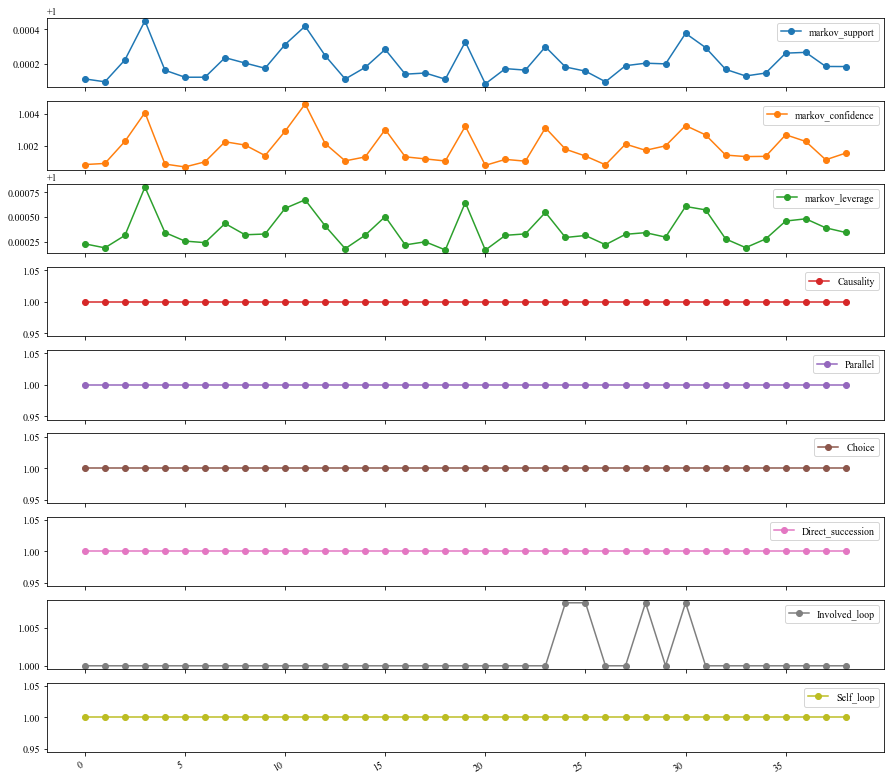

In [284]:
diff_mean.rolling(window=window).mean().plot(figsize=(15,15), subplots=True, marker='o')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4E63D7F88>,
      dtype=object)

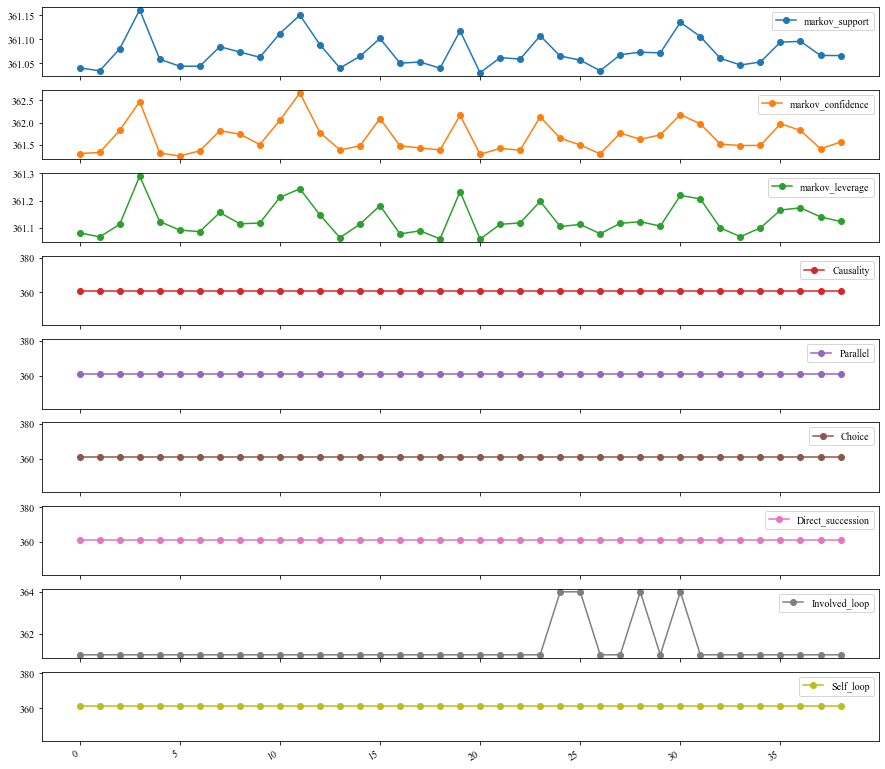

In [290]:
diff_sum.rolling(window=window).mean().plot(figsize=(15,15), subplots=True, marker='o')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4C5A31088>,
      dtype=object)

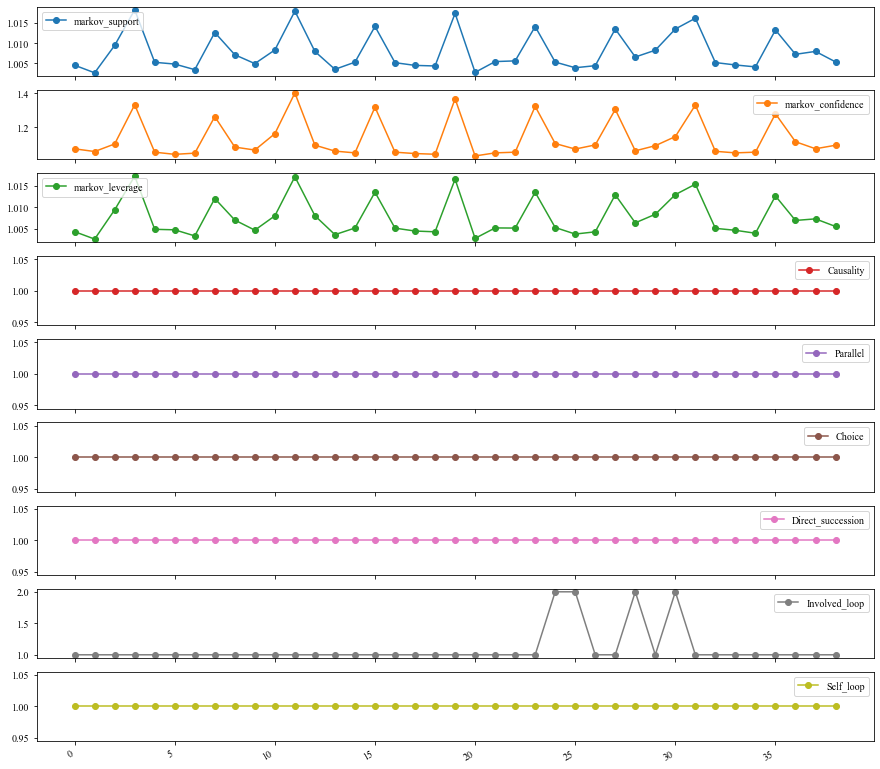

In [286]:
diff_max.rolling(window=window).mean().plot(figsize=(15,15), subplots=True, marker='o')

In [265]:
# from scipy.stats import entropy
# df = pd.DataFrame(lr.get_transition_matrix_representation(tokens[0:250]),columns=["Prob"]).reset_index()
# dist1 = df.loc[df['From'] == "Appraise_property"]["Prob"]
# dist1.hist()
# plt.show()

# df2 = pd.DataFrame(lr.get_transition_matrix_representation(tokens[250:500]),columns=["Prob"]).reset_index()
# dist2 = df2.loc[df2['From'] == "Appraise_property"]["Prob"]
# dist2.hist()
# plt.show()

# df3 = pd.DataFrame(lr.get_transition_matrix_representation(tokens[1000:1250]),columns=["Prob"]).reset_index()
# dist3 = df3.loc[df3['From'] == "Appraise_property"]["Prob"]
# dist3.hist()
# plt.show()

# print(pd.Series(entropy([dist1, dist2], base=2)).sum(skipna=None))
# print(pd.Series(entropy([dist2, dist3], base=2)).sum(skipna=None))

In [168]:
# df = lr.get_association_rules_representation(tokens[0:250])
# df
# # df[df['antecedents'] == 'Assess_eligibility']

### Drift Detection

In [388]:
margin_error = 2
log_size = len(tokens)

In [389]:
# metric = ['inter_dist_euclidean_mean', 'validity_index', 'dist_intra_cluster_list_mean']
# model_cpd = "rbf"  # "l1","l2", "rbf", "linear", "normal", "ar"
# for i in range(8,len(run_df),1):
#     print("########Rodada:", i)
#     signals = run_df[metric].iloc[i-8:i]
#     algo = rpt.Window(model=model_cpd, width=4, min_size=3, jump=1).fit(signals)
#     my_bkps = algo.predict(pen=0)[:-1]  #n_bkps=None, pen=None, epsilon=None
#     print("y_pred: ",my_bkps)
    
#     rpt.display(signal=signals
#                 , true_chg_pts=[4]
#                 , computed_chg_pts=my_bkps
#                 , figsize=(10, 4))
#     plt.show()

y_pred:  [3, 6, 9, 12, 15, 18, 22, 25, 29, 33, 36]
y_true:  [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36]


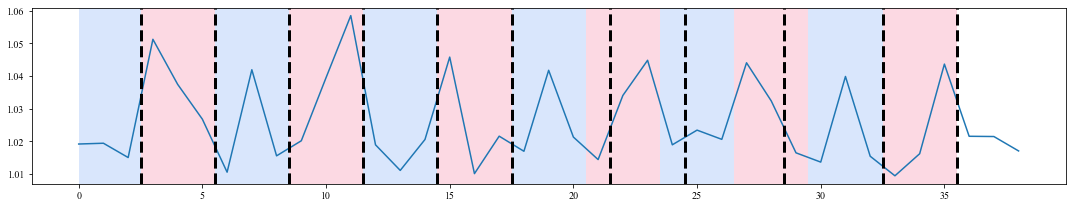

In [513]:
# change point detection
# window_cpd=1
metric = metrics
model_cpd = "rbf"  # "l1","l2", "rbf", "linear", "normal", "ar"
signals = diff_mean_total.rolling(window=window).mean().dropna()#.fillna(0)

#Window, Pelt, Binseg
algo = rpt.Binseg(model=model_cpd, min_size=1, jump=1).fit(signals.values)
# algo = rpt.Pelt(model=model_cpd, min_size=2, jump=2).fit(signals.values)
# algo = rpt.Window(model=model_cpd, width=4, min_size=1, jump=1).fit(signals.values)
my_bkps = algo.predict(pen=0)[:-1]  #n_bkps=None, pen=None, epsilon=None
print("y_pred: ",my_bkps)

# show results
new_y_true = list(range(int((len(signals))/10), (len(signals)), int((len(signals))/10)))

print("y_true: ",new_y_true)
rpt.display(signal=signals
            , true_chg_pts=new_y_true
            , computed_chg_pts=my_bkps
            , figsize=(15, 3))
plt.show()

In [392]:
# run_df[metric].plot(figsize=(10, 4))
# run_df[metric].rolling(window=3).mean().plot(figsize=(10, 4))
# run_df[metric].rolling(window=3).apply(lambda x: (x.iloc[1] - x.iloc[0])/x.iloc[0]).plot(figsize=(10, 4))

### Run All

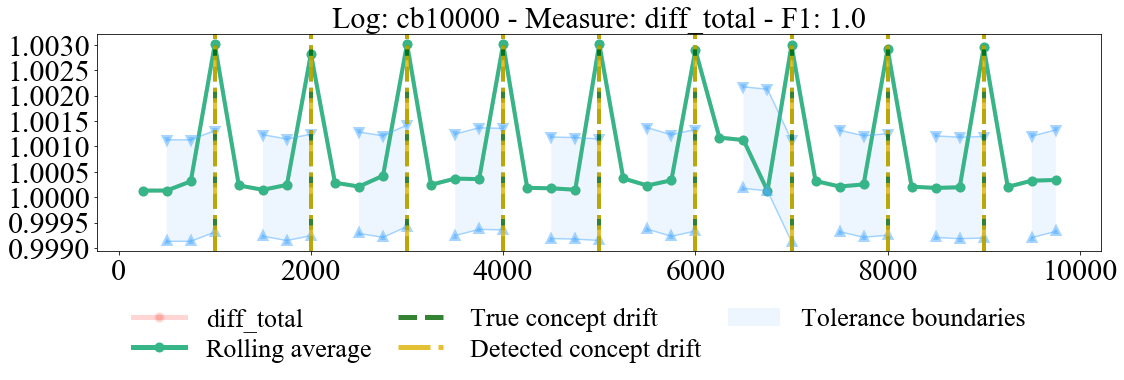

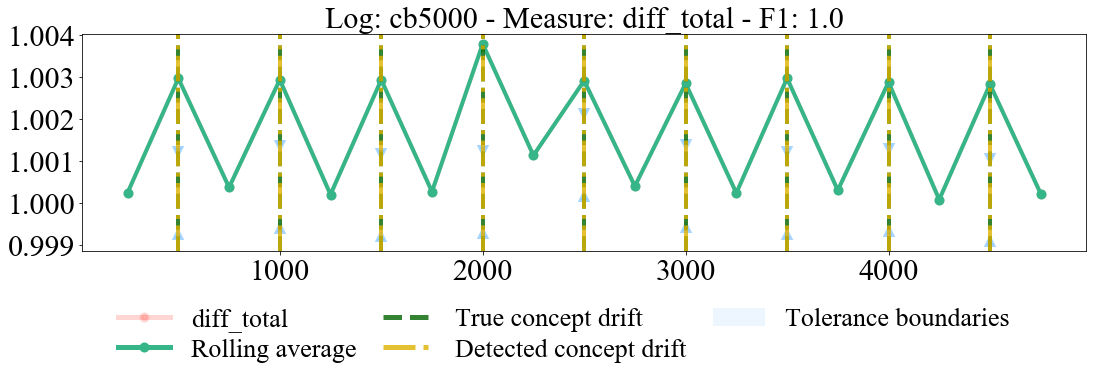

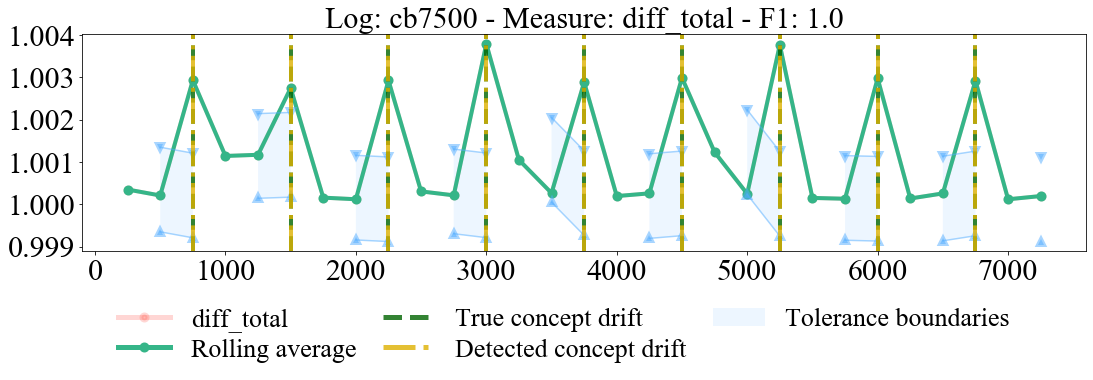

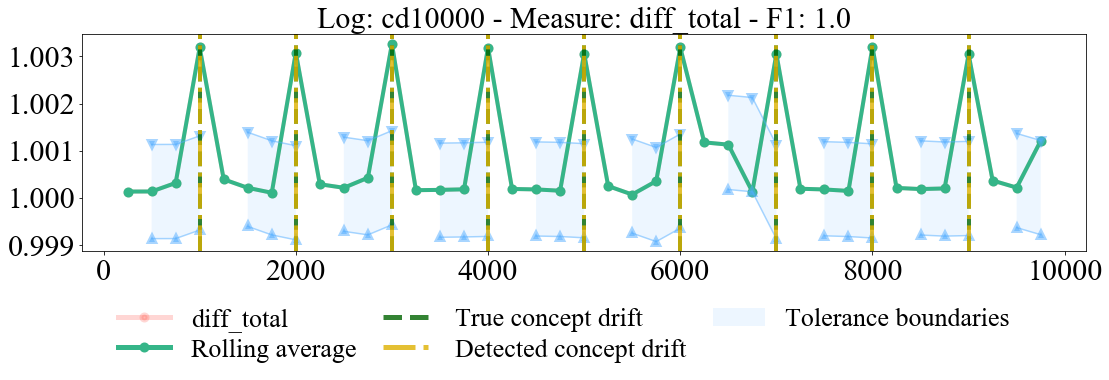

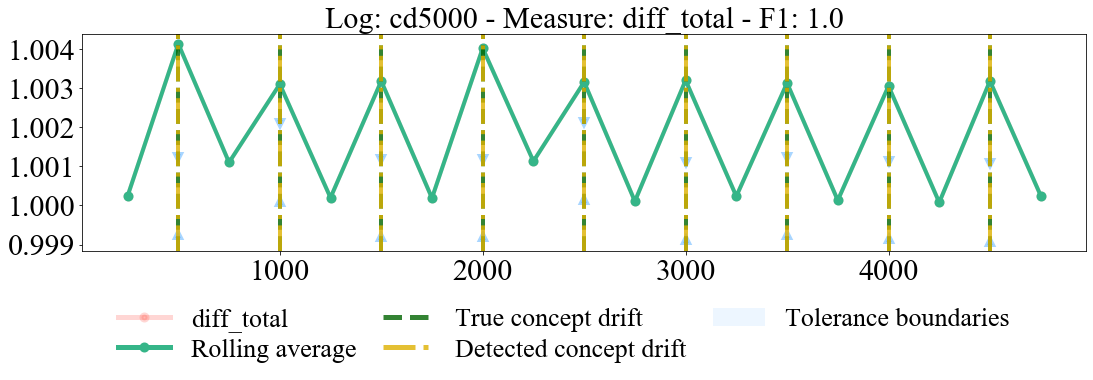

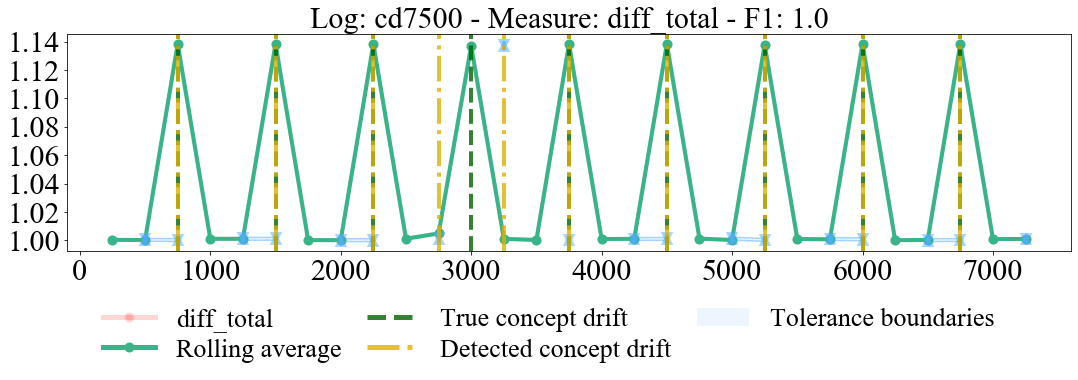

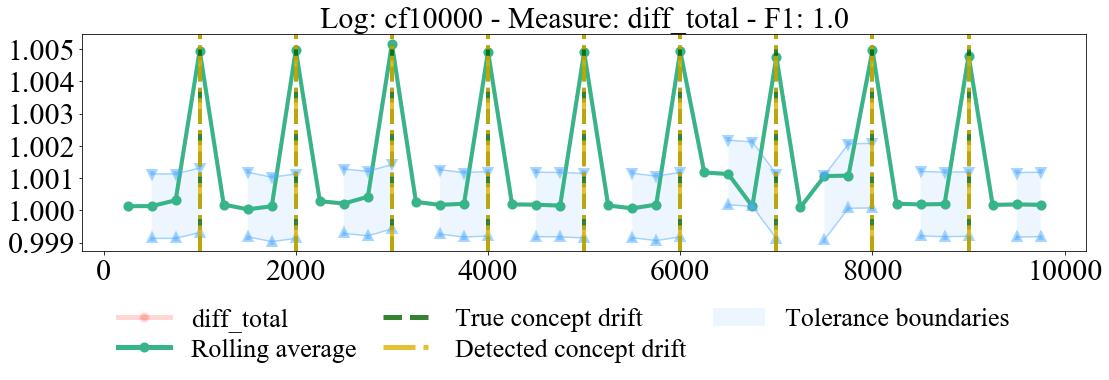

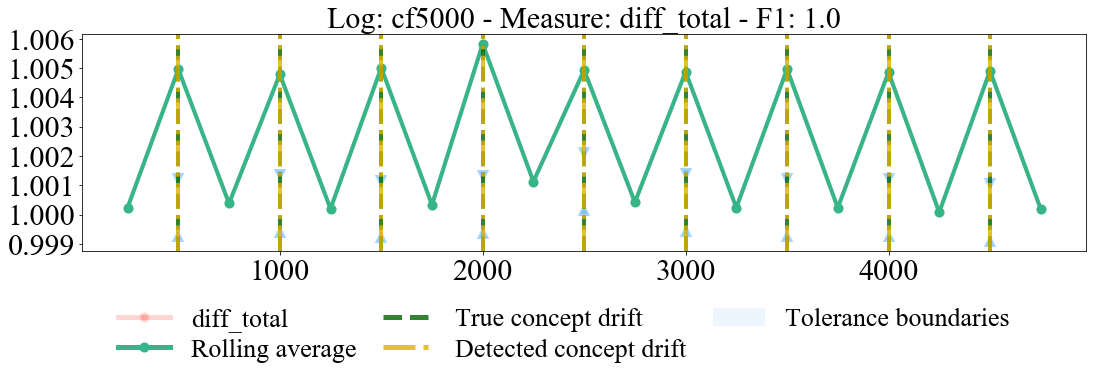

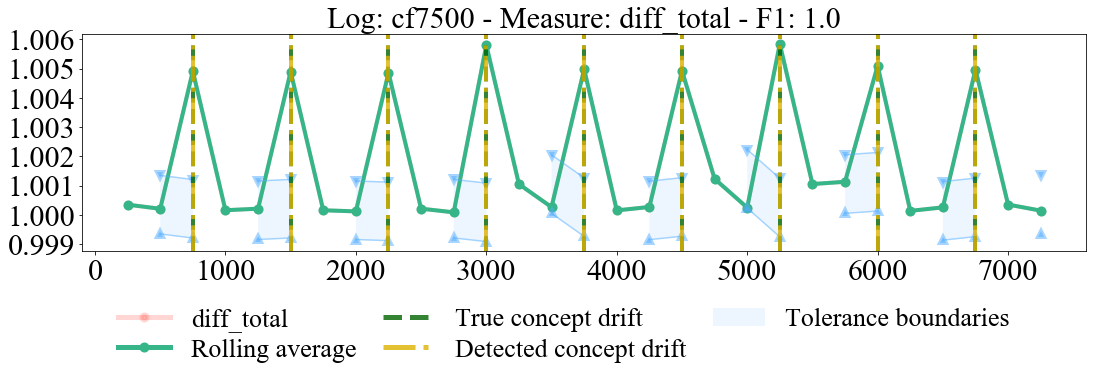

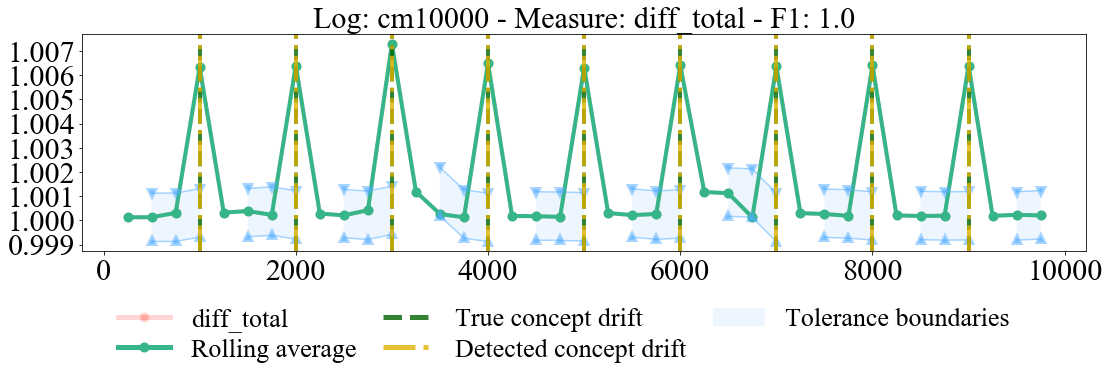

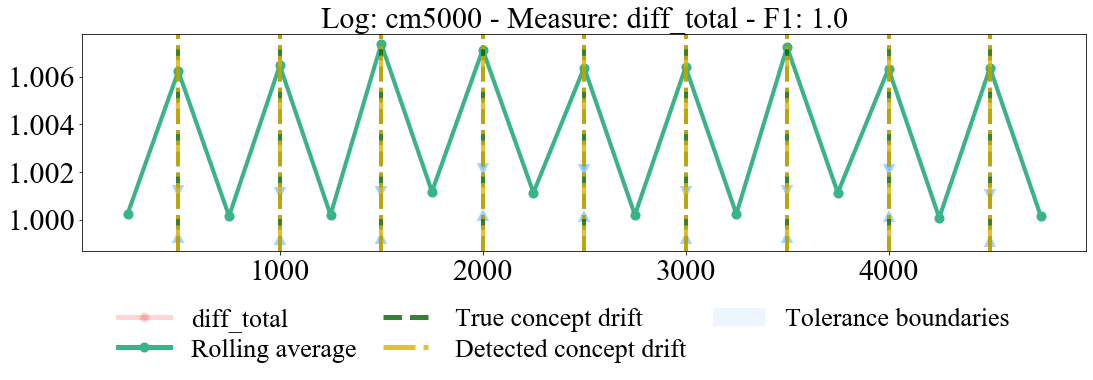

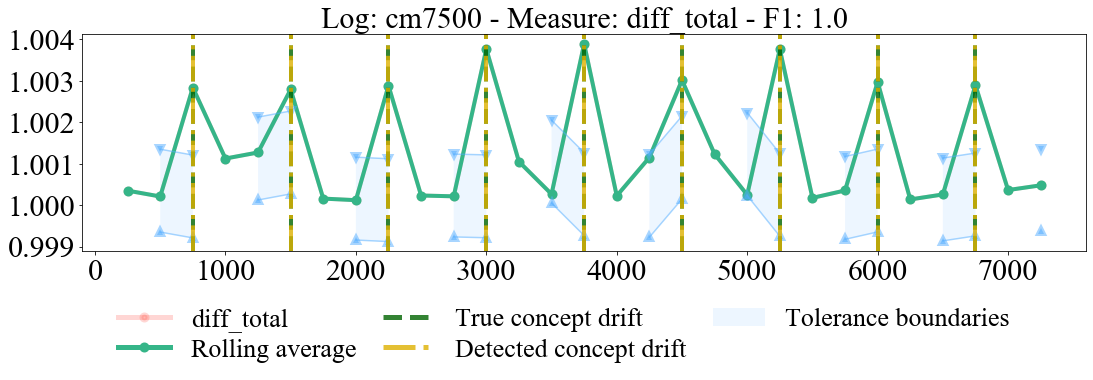

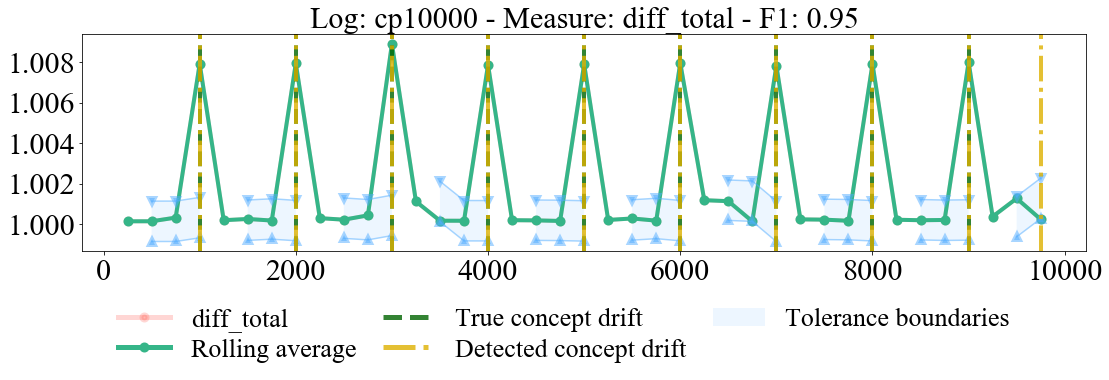

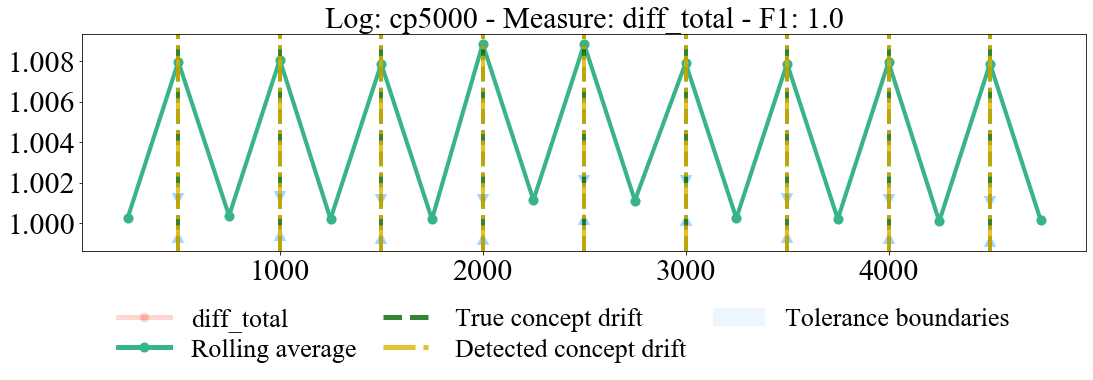

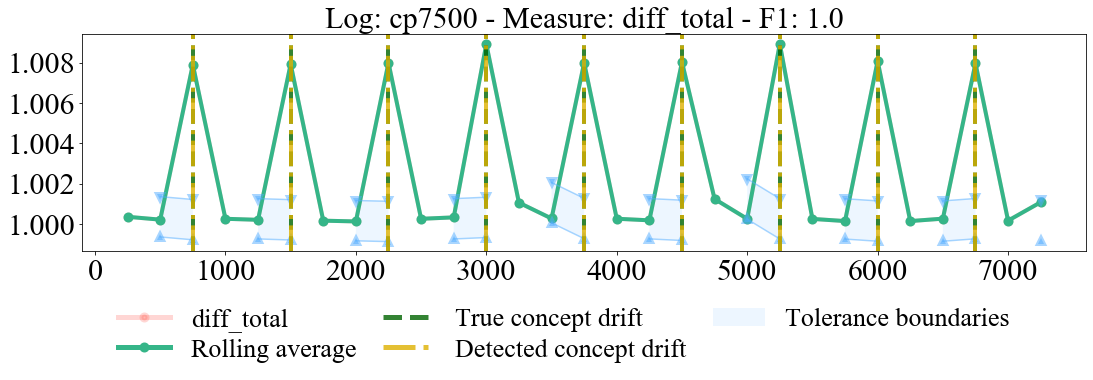

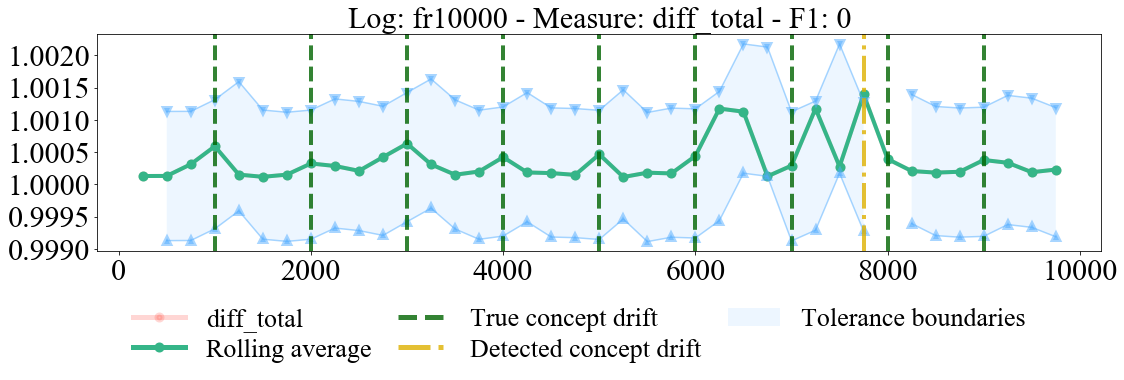

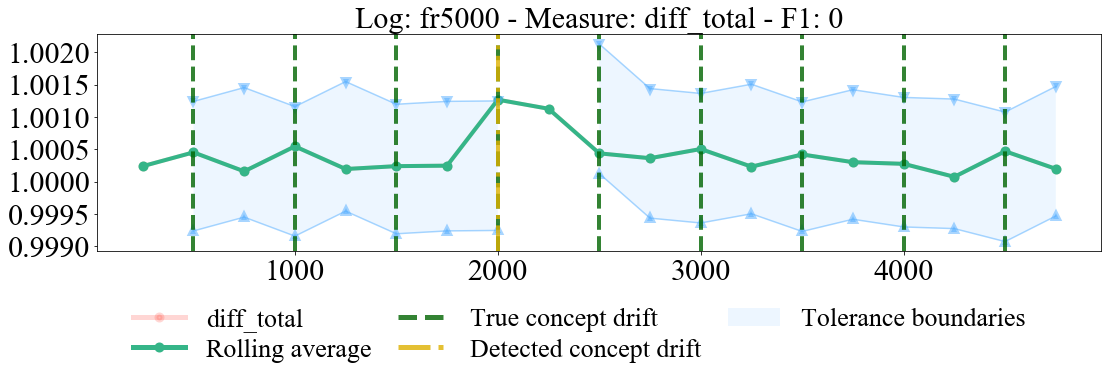

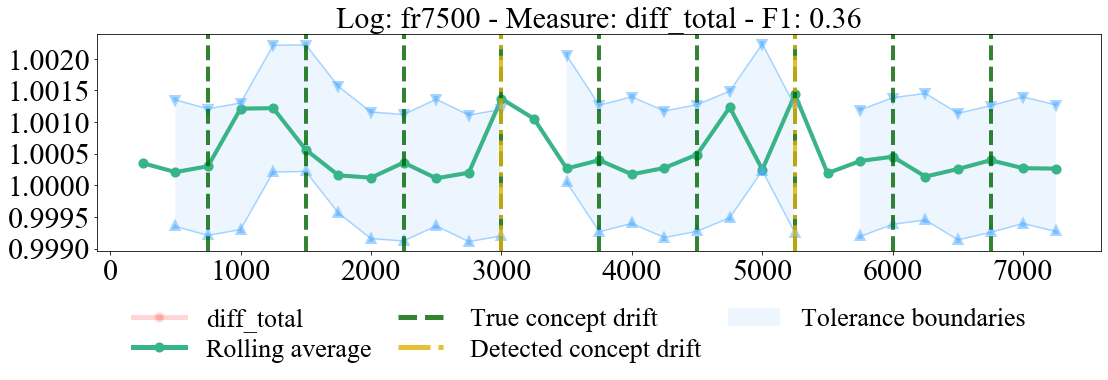

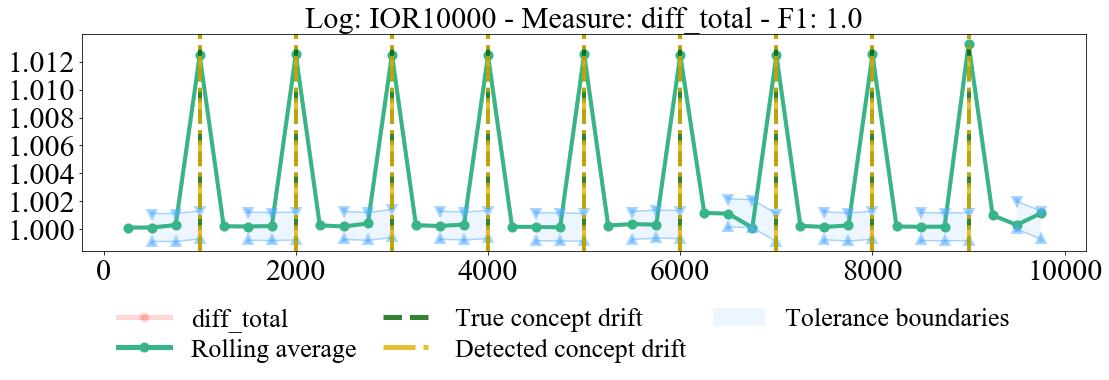

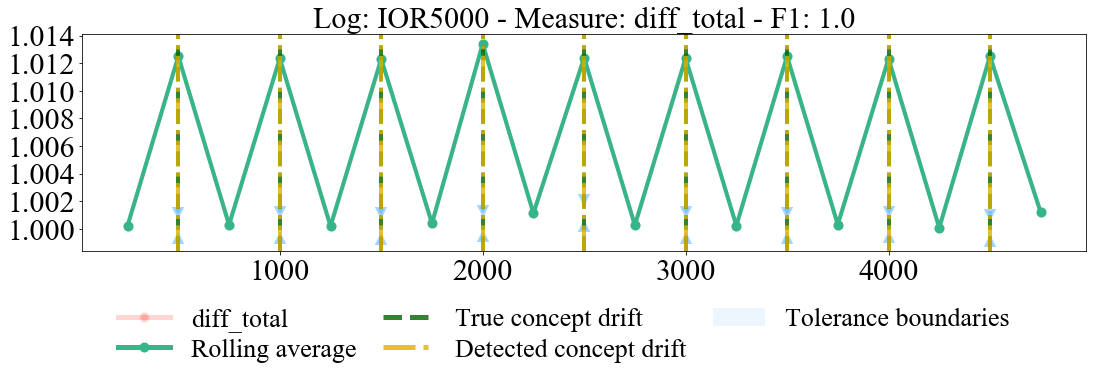

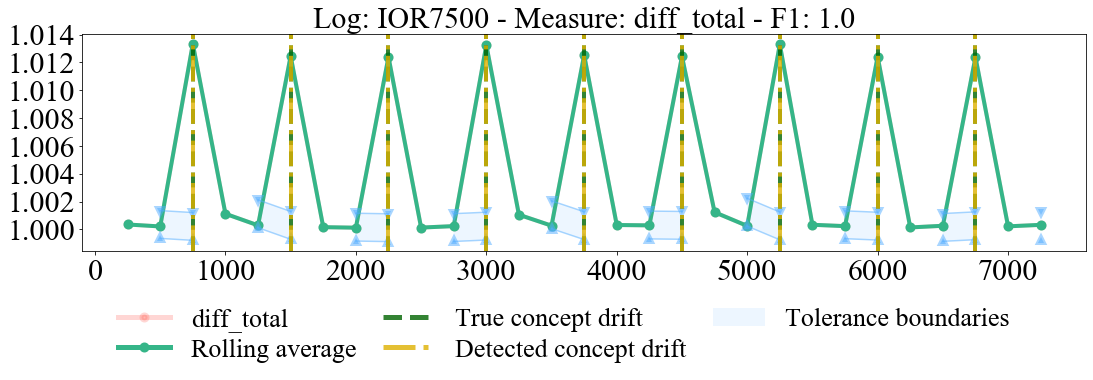

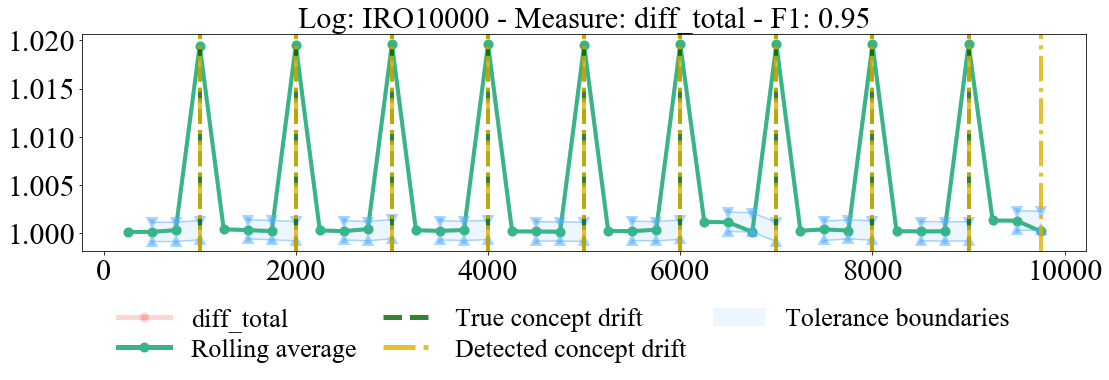

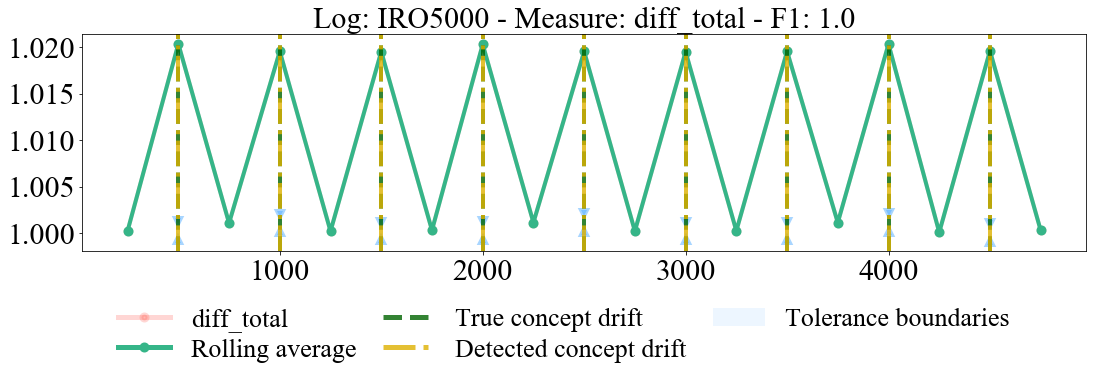

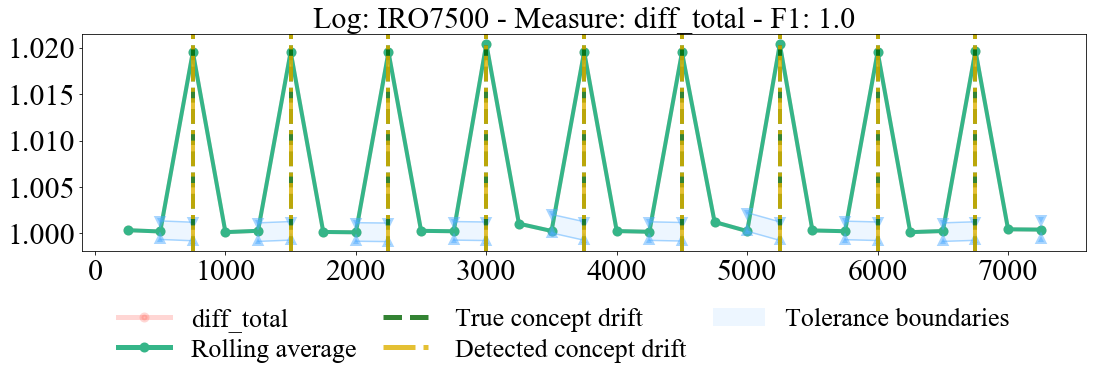

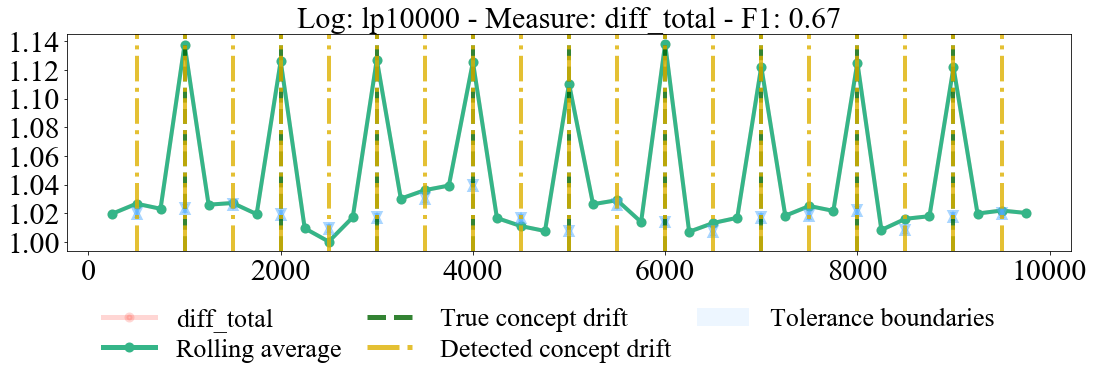

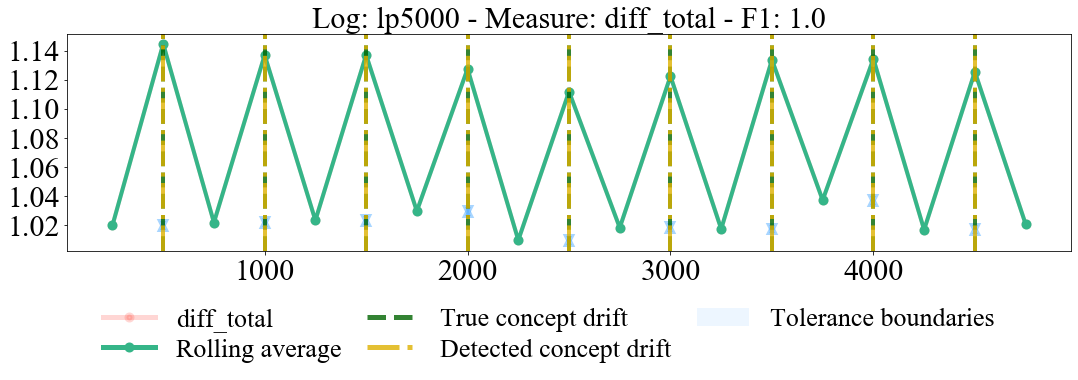

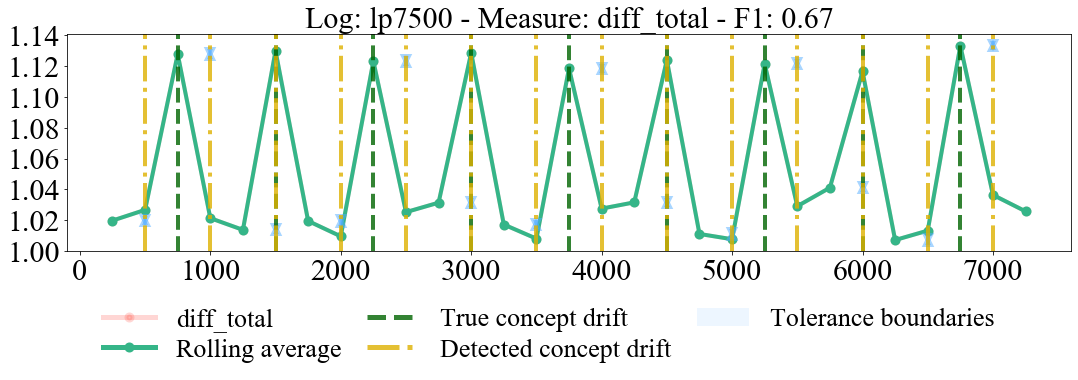

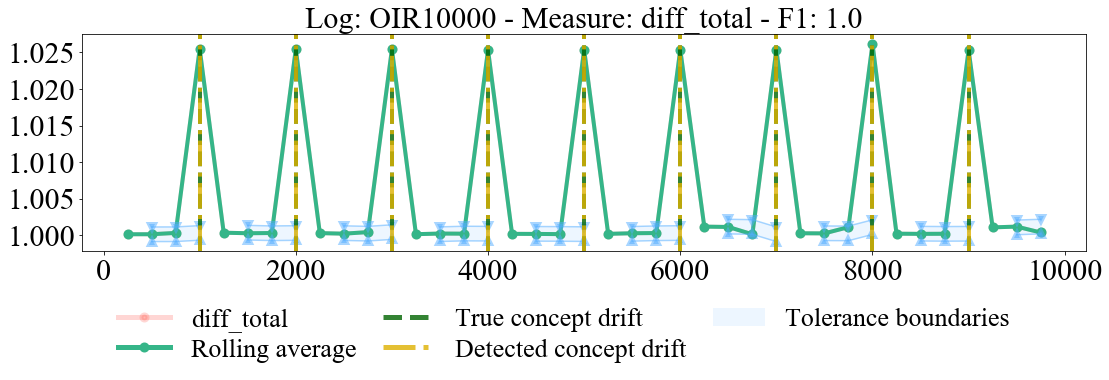

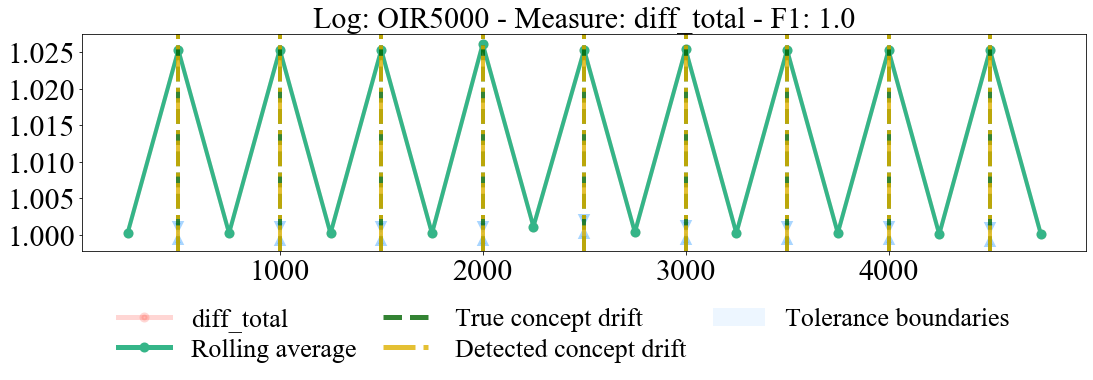

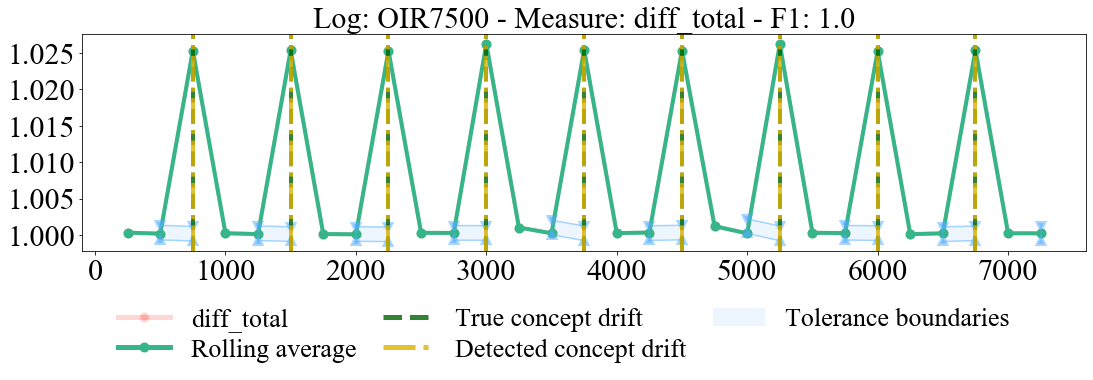

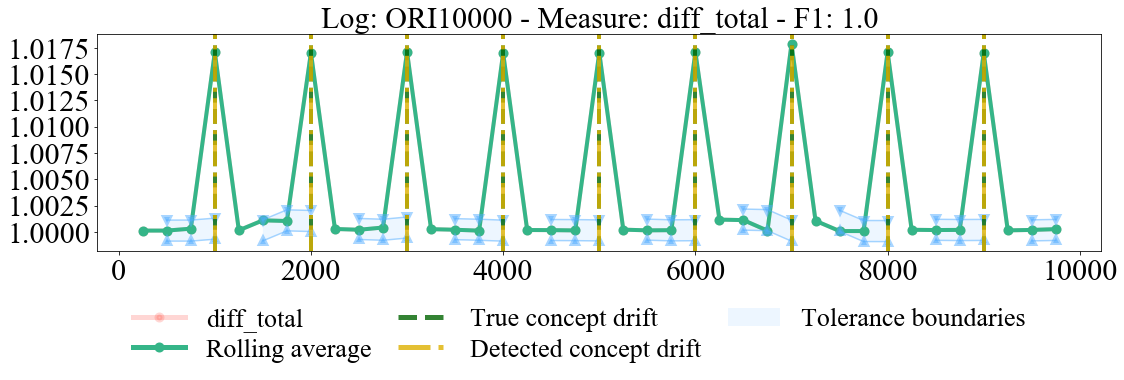

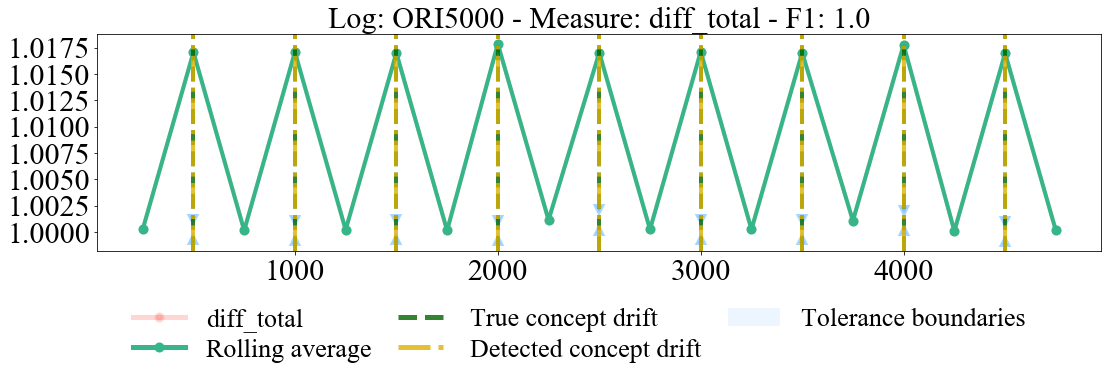

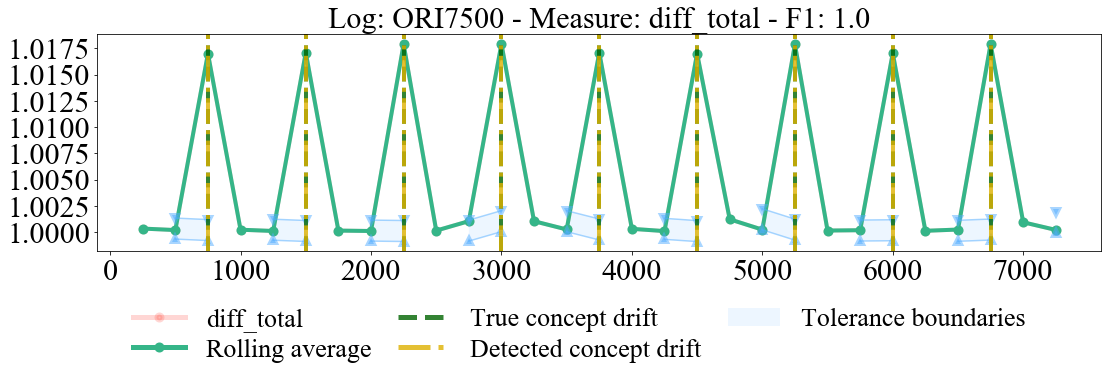

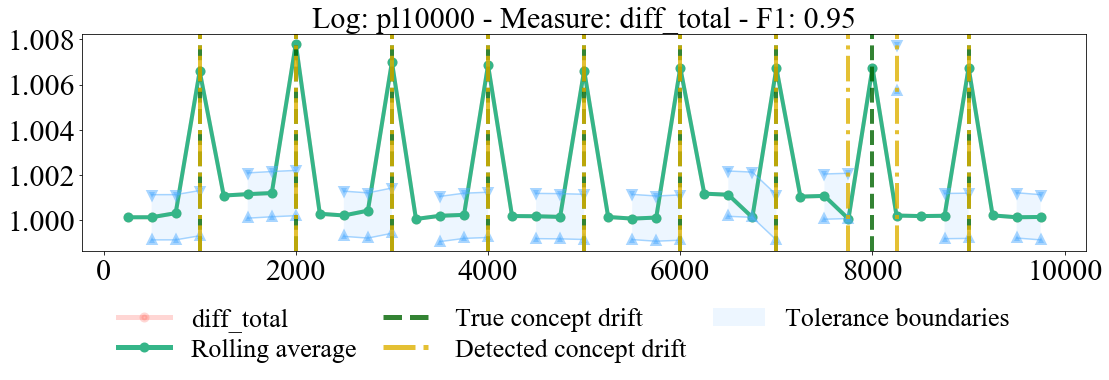

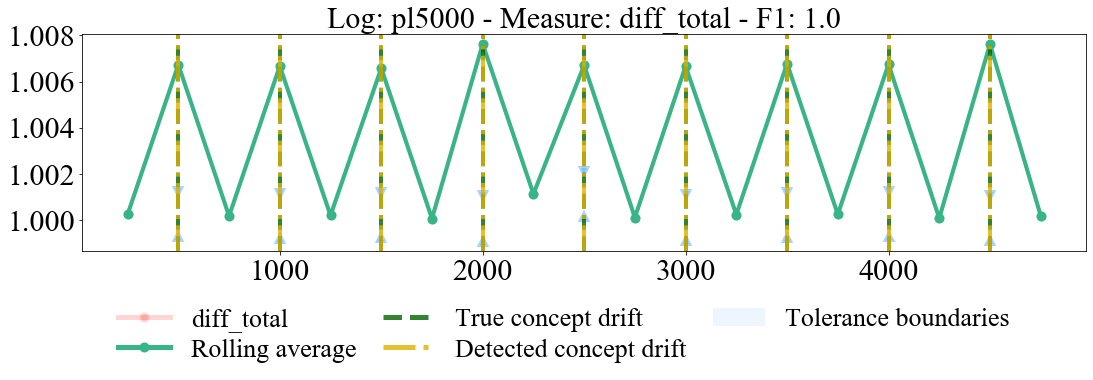

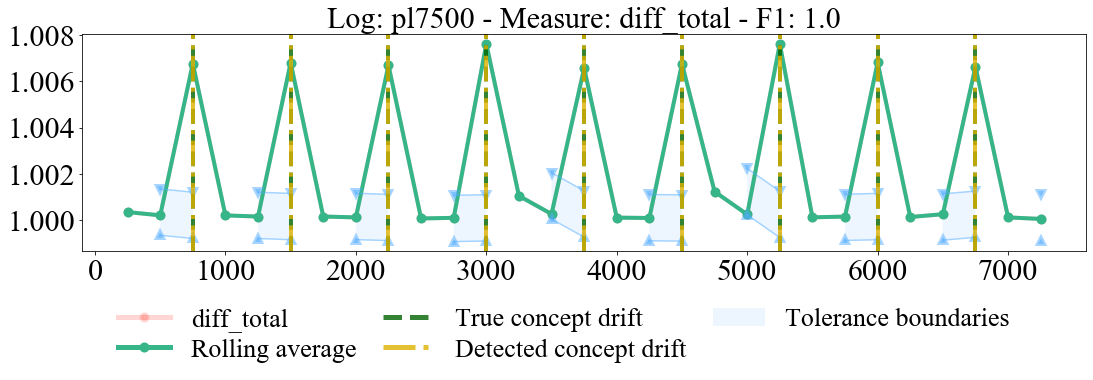

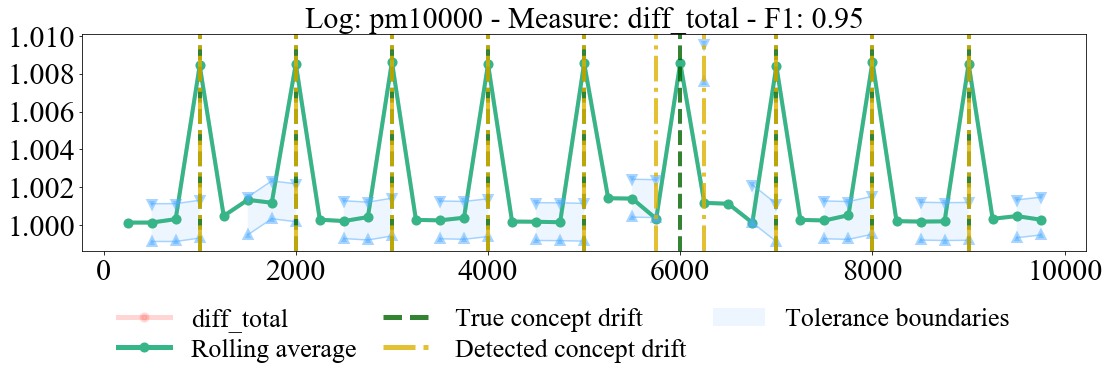

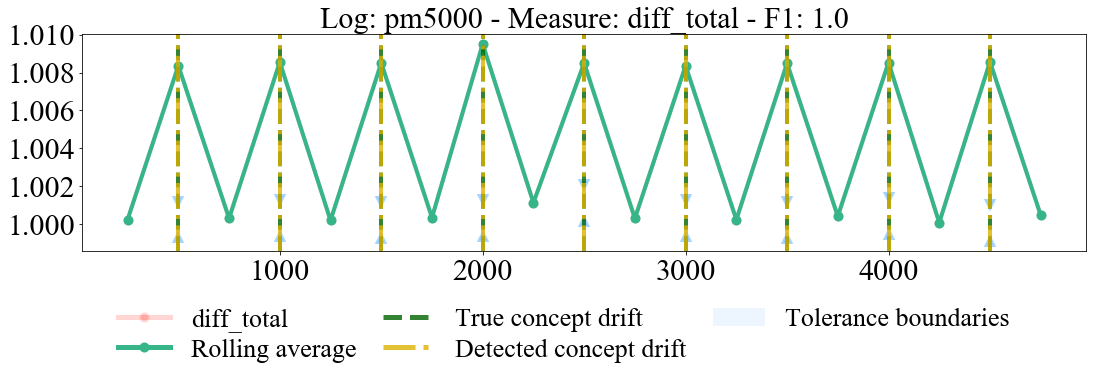

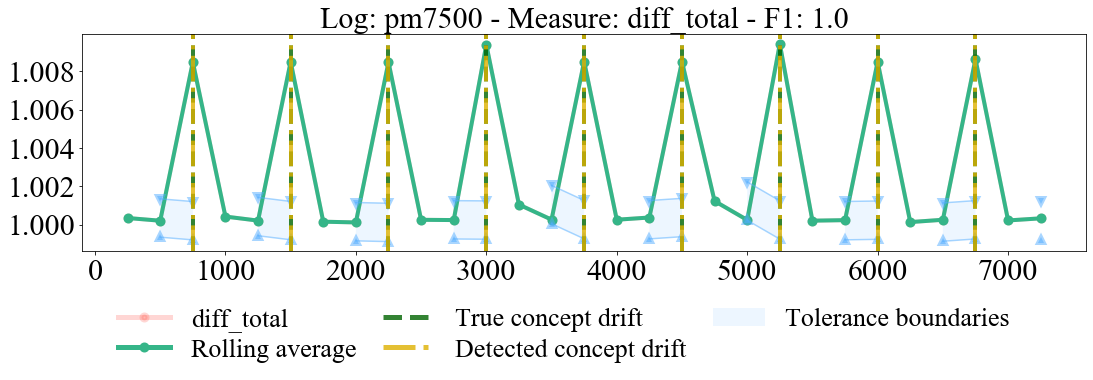

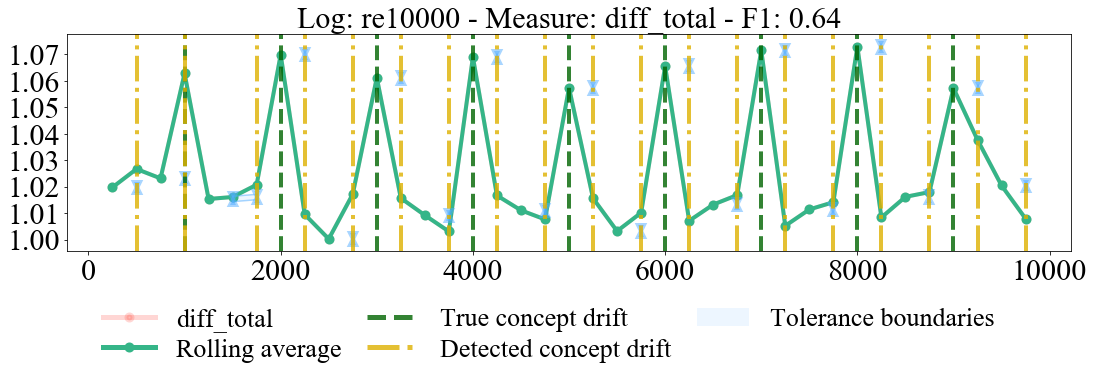

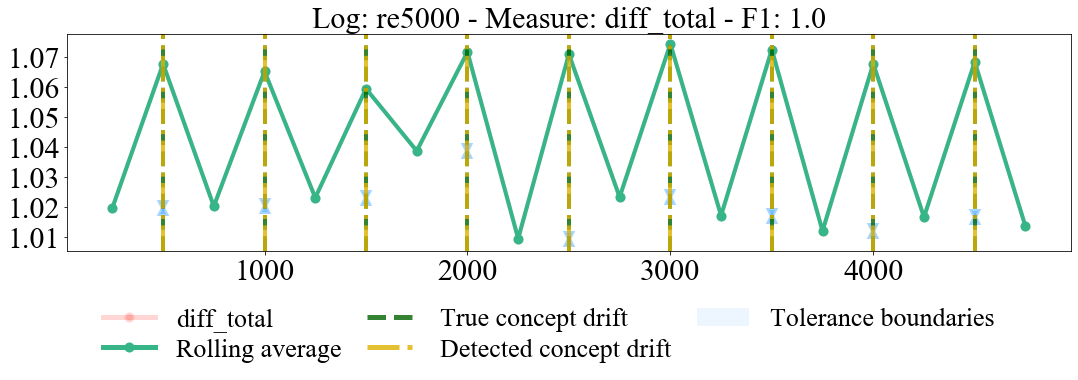

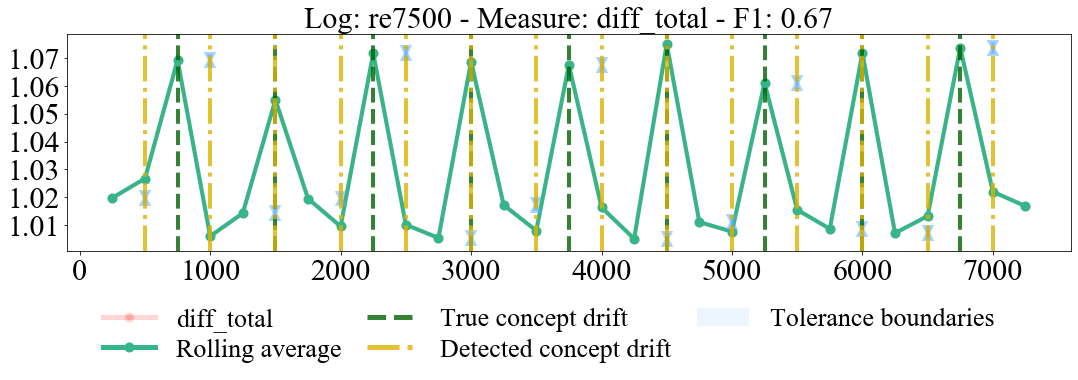

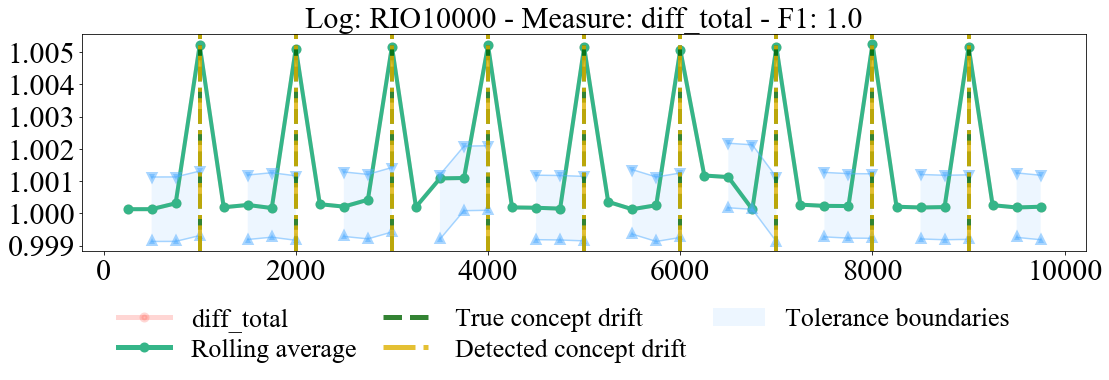

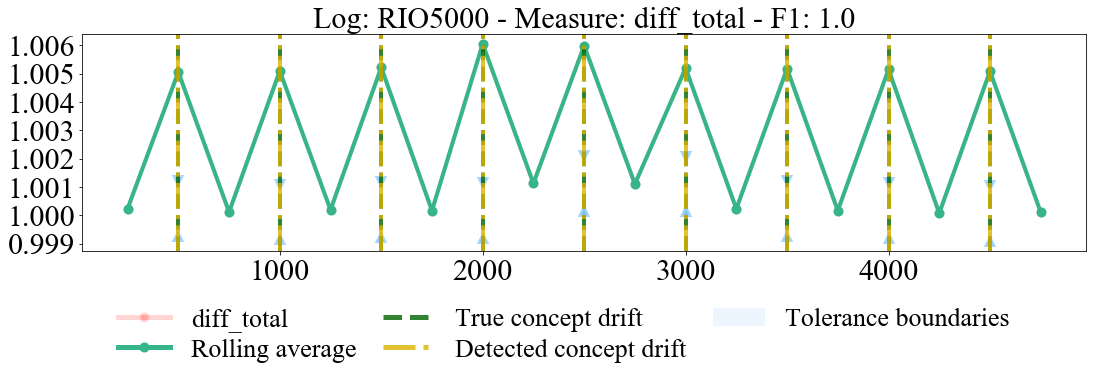

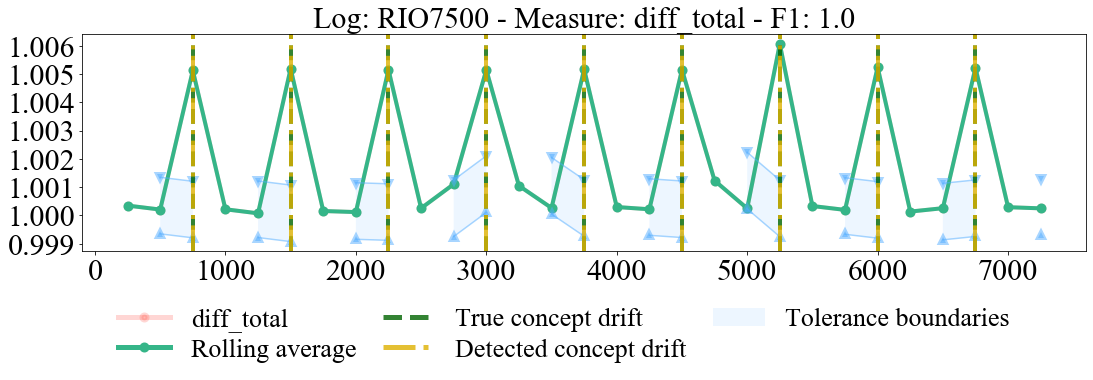

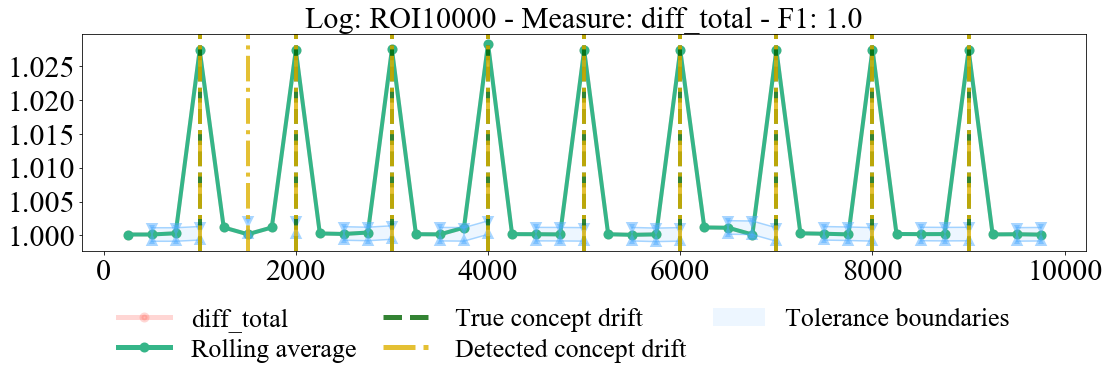

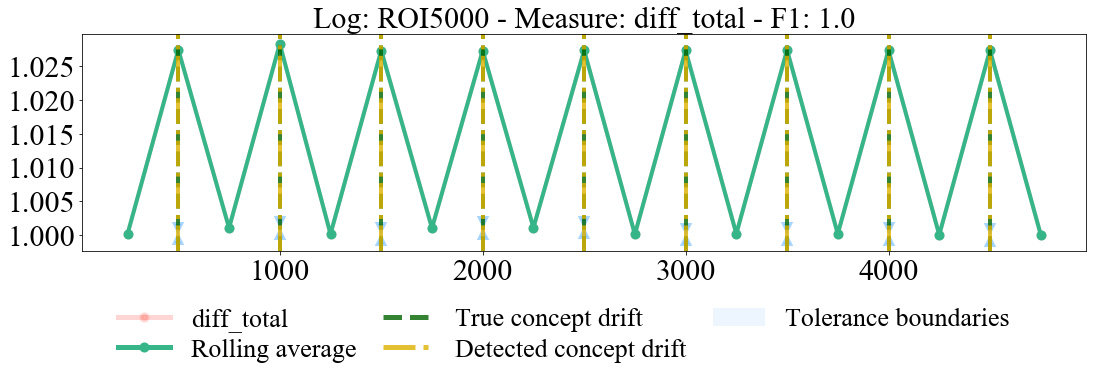

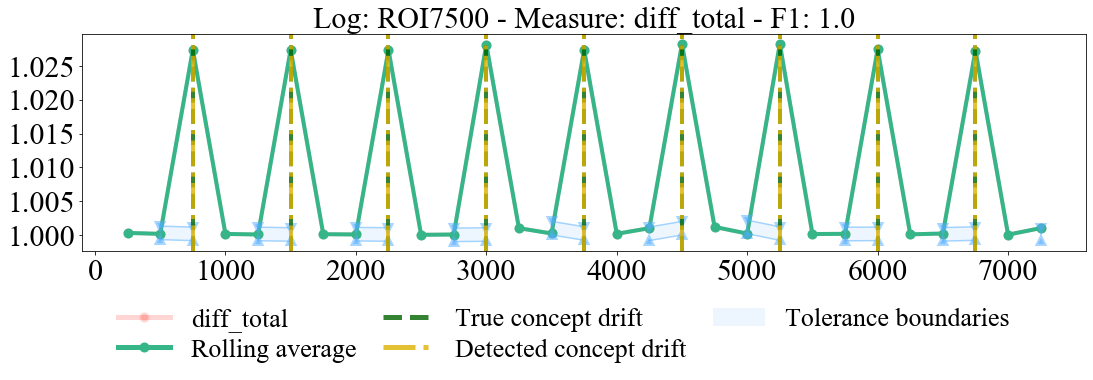

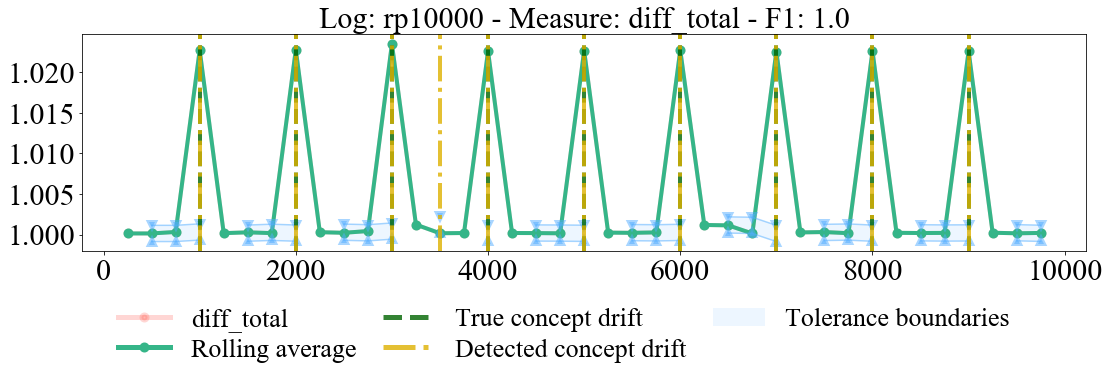

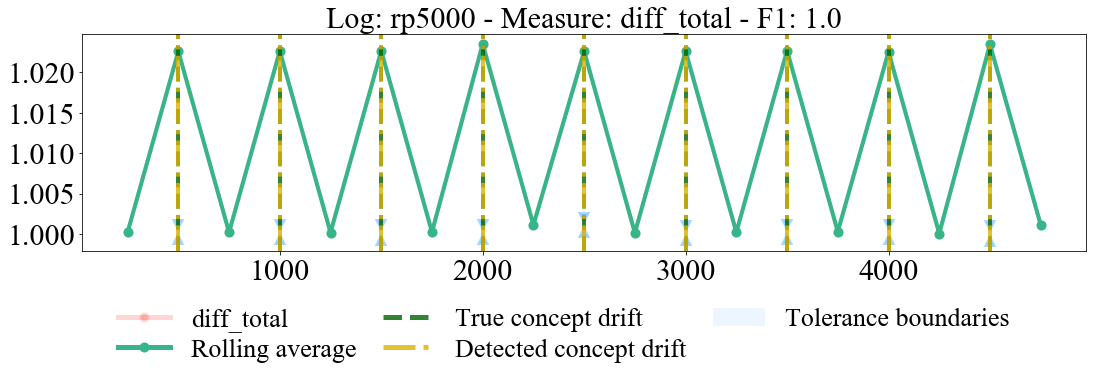

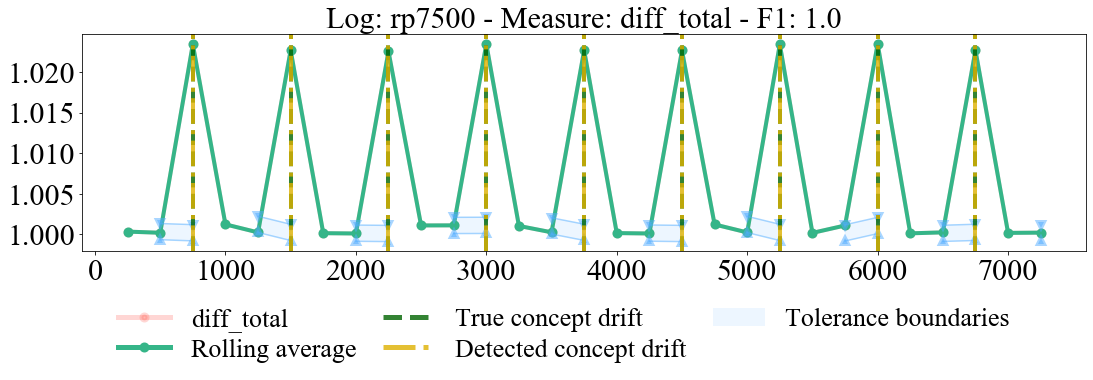

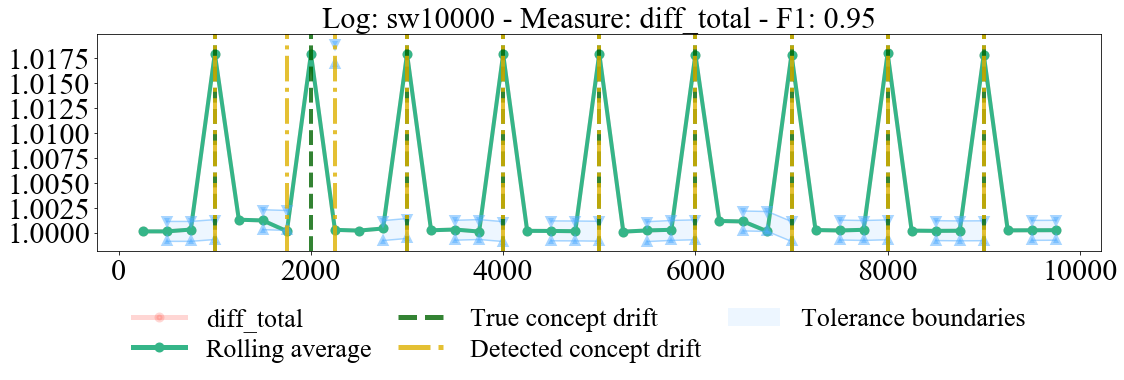

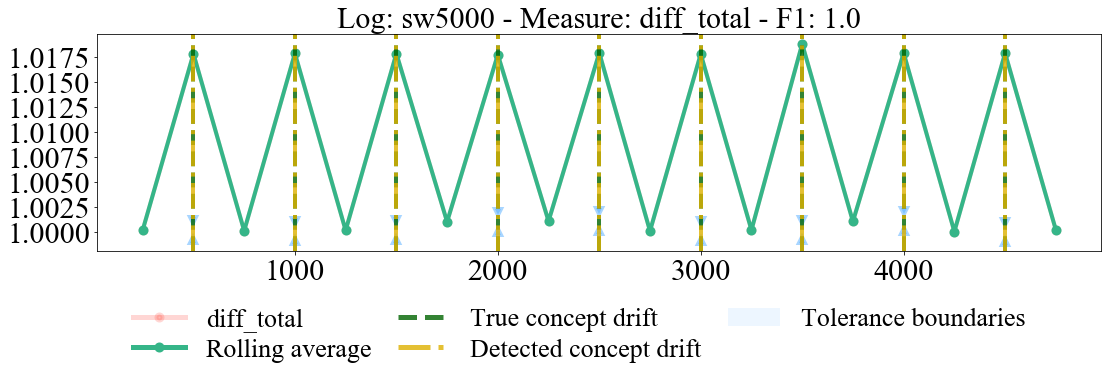

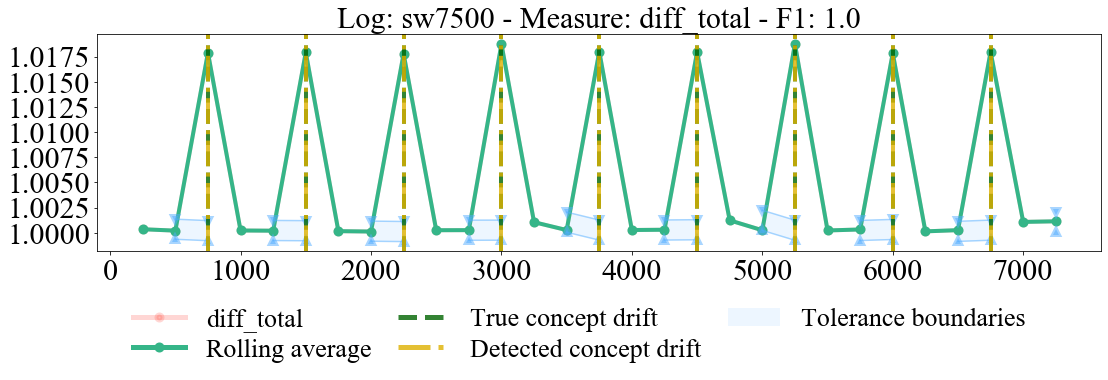

In [267]:
results = []
with PdfPages('results_plot.pdf') as pdf:
    for log in tqdm_notebook(logs):
    #     print("############################################################")
    #     print("Log:", log)
        tipo_mudanca = log.split("/")[-1].split("\\")[-2]
        log_read = pm.all_prep(log)
        tokens = lr.get_traces_as_tokens(log_read)
        log_size = len(tokens)
        y_true = list(range(int(log_size/10), log_size, int(log_size/10)))
        window_size = 250
        sliding_step = 0
        rolling_window = 1
        std_tolerance = 0.001
        min_tol = 0.001
        margin_error = 2

        result = MARDD.run_window_measures(
            sequences = tokens
            , window_size = window_size
            , sliding_step = sliding_step
        )
#         print(result)

        for measure in ["diff_total"]:#confidence_ass_markov, "conviction_ass_markov", "conviction_trans_prob", "conviction_ass_rules"]: #result:
    #     measure = "conviction_ass_markov"
    #         print("Measure: ", measure)
            drifts, not_drifts, info = MARDD.detect_concept_drift(
                result,
                measure,
                rolling_window = rolling_window,
                std_tolerance = std_tolerance,
                min_tol = min_tol,
                verbose=False
            )

            metrics = MARDD.get_metrics(
                drifts
                , not_drifts
                , y_true
                , window_size
                , sliding_step
                , log_size
                , margin_error
            )
    #         print("Metrics:", metrics) #metrics['F1']
    #         print("Drifts_Found", metrics['Drifts_Found'])
    #         print("Drifts_Found", metrics['Drifts_Found'])

            # Save detection plot
            plts.plot_deteccao_drift(
                result,
                measure,
                drifts,
                y_true,
                info['means'],
                info['lowers'],
                info['uppers'],
                save_png=""
            )

            plt.title("Log: " + tipo_mudanca + str(log_size) 
                        + " - Measure: " + measure + " - F1: " + str(round(metrics['F1'],2))
                      , size=30)

            pdf.savefig()
            plt.show()

            # Save results
            dict_temp = {"log": log}
            dict_temp["log_size"] = log_size
            dict_temp["tipo_mudanca"] = tipo_mudanca
            dict_temp["window_size"] = window_size
            dict_temp["sliding_step"] = sliding_step
            dict_temp["rolling_window"] = rolling_window
            dict_temp["std_tolerance"] = std_tolerance
            dict_temp["min_tol"] = min_tol
            dict_temp["margin_error"] = margin_error
            dict_temp["measure"] = measure
            dict_temp.update(metrics)
            results.append(dict_temp)

    results = pd.DataFrame(results)

In [287]:
params = ["window_size", "sliding_step", "rolling_window", "std_tolerance", "min_tol"
          , "margin_error", "measure"]
scenarios = ["tipo_mudanca", "log_size"]
validation_metrics = ["F1","Delay","Mean_test_per_drift"]#,"Support","Precision","Recall"]

all_results_grouped = results.groupby(params)[validation_metrics].agg(['mean','std']) #,'count'
all_results_grouped.columns = all_results_grouped.columns.map('_'.join)
all_results_grouped.sort_values(["F1_mean","Delay_mean"], ascending=[False,True], inplace=True)
# # all_results_grouped.to_excel(OUTPUT_RESULTS + all_results_grouped_'+model+'.xlsx', sheet_name=model)
all_results_grouped.head(200)

F1_mean  \
window_size sliding_step rolling_window std_tolerance min_tol margin_error measure                
250         0            1              0.001         0.001   2            diff_total  0.921173   

                                                                                         F1_std  \
window_size sliding_step rolling_window std_tolerance min_tol margin_error measure                
250         0            1              0.001         0.001   2            diff_total  0.219096   

                                                                                       Delay_mean  \
window_size sliding_step rolling_window std_tolerance min_tol margin_error measure                  
250         0            1              0.001         0.001   2            diff_total    0.096708   

                                                                                       Delay_std  \
window_size sliding_step rolling_window std_tolerance min_tol margin_error measure                 
250         0            1              0.001         0.001   2            diff_total   0.345377   

                                                                                       Mean_test_per_drift_mean  \
window_size sliding_step rolling_window std_tolerance min_tol margin_error measure                                
250         0            1              0.001         0.001   2            diff_total                   2.08642   

                                                                                       Mean_test_per_drift_std  
window_size sliding_step rolling_window std_tolerance min_tol margin_error measure                              
250         0            1              0.001         0.001   2            diff_total                 0.906962

In [288]:
best_results_by_representation = all_results_grouped.reset_index().groupby("measure").head(1).reset_index().sort_values(["F1_mean","Delay_mean"], ascending=[False,True])
best_results_by_representation

index  window_size  sliding_step  rolling_window  std_tolerance  min_tol  \
0      0          250             0               1          0.001    0.001   

   margin_error     measure   F1_mean    F1_std  Delay_mean  Delay_std  \
0             2  diff_total  0.921173  0.219096    0.096708   0.345377   

   Mean_test_per_drift_mean  Mean_test_per_drift_std  
0                   2.08642                 0.906962

In [289]:
best_result = pd.merge(left=results
            , right=best_results_by_representation
            , how='inner', on=params)
results_table = best_result.pivot_table(values=["F1"]#,"Delay"]
                                        , index=["tipo_mudanca"]
                                        , columns=["measure"]
                                        , aggfunc='mean')\
                                    .sort_index(axis='columns',level=[1,0], ascending=[True,False])

# results_table.to_excel(OUTPUT_RESULTS + 'results_table_'+model+'.xlsx', sheet_name=model)
results_table

F1
measure      diff_total
tipo_mudanca           
IOR            1.000000
IRO            0.982456
OIR            1.000000
ORI            1.000000
RIO            1.000000
ROI            1.000000
cb             1.000000
cd             1.000000
cf             1.000000
cm             1.000000
cp             0.982456
fr             0.121212
lp             0.777778
pl             0.982456
pm             0.982456
re             0.769841
rp             1.000000
sw             0.982456